# **PROYECTO: VIGILANCIA EPIDEMIOLÓGICA DEL DENGUE EN ARGENTINA**


Este proyecto tiene como objetivo aplicar herramientas de programación en Python para limpieza, preprocesamiento, organización y análisis de datos, así como para la exploración de modelos de Machine Learning relacionados con la vigilancia epidemiológica
del dengue. 

- **Autor:** Alan Ruiz  
- **Perfil:** Biólogo | Ciencia de datos Jr. | Analista de datos Jr. 
- **Lenguaje:** Python 

## **Resumen ejecutivo:**
En este proyecto se analiza la vigilancia epidemiológica del dengue en Argentina, integrando datos sanitarios y climáticos. Se desarrolló un modelo predictivo basado en Random Forest que mostró una mejora significativa tras el ajuste de hiperparámetros, identificando la incidencia previa y variables climáticas como factores clave.

## **Fuentes de datos**

Los datos utilizados para la construcción del dataset provienen de fuentes públicas oficiales:

- **Ministerio de Salud de la Nación (Argentina)**  
  Boletines epidemiológicos nacionales.  
  https://datos.salud.gob.ar/dataset

- **Servicio Meteorológico Nacional (SMN)**  
  Datos climatológicos históricos por provincia.  
  https://www.smn.gob.ar/descarga-de-datos

Los datos fueron procesados, limpiados y agregados por el autor con fines
educativos y de análisis.

## **Contexto**

El dengue es una enfermedad viral transmitida por mosquitos que representa un desafío creciente para la salud pública en Argentina.
El análisis de datos epidemiológicos permite identificar patrones temporales, geográficos y poblacionales que resultan clave para la vigilancia y la toma de decisiones.

En este proyecto se realiza un análisis exploratorio de datos de casos de dengue en Argentina, integrando información epidemiológica, climática y poblacional.


## **Objetivos**

- Analizar la evolución temporal de los casos de dengue en Argentina
- Identificar provincias y departamentos con mayor carga de casos
- Explorar la relación entre variables climáticas e incidencia del dengue
- Aplicar técnicas de limpieza y análisis exploratorio de datos en un contexto real
- Realizar una comparación exploratoria de modelos de Machine Learning

## **Hipótesis**


La evolución temporal de los casos de Dengue en Argentina presenta patrones identificables y relaciones significativas con las variables epidemiológicas disponibles en el dataset, lo que permitiría anticipar aumentos en la cantidad de casos y contribuir al diseño de medidas preventivas más oportunas para reducir la proliferación de la enfermedad.

## **¿A quién está dirigido este análisis?**

Este proyecto está orientado a:
- Analistas de datos en salud pública
- Tomadores de decisión epidemiológica
- Equipos de vigilancia sanitaria

El objetivo es transformar datos epidemiológicos en insights accionables.


## **Estructura general**

El notebook se organiza de la siguiente manera:

- **1. Carga de librerias y configuración del dataset**
- **2. Limpieza y preprocesamiento de datos**
- **3. Análisis exploratorio de los datos (EDA)**
- **4. Comparación exploratoria de modelos**
- **5. Conclusiones y líneas futuras de trabajo**


# **1. Carga de librerías y configuración del dataset**


In [1]:
# Importe de librerías necesarias para el análisis

import pandas as pd
import numpy as np
from functools import reduce
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [2]:
# Importe de librerias necesarias para comparación exploratoria de modelos de ML

import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from itertools import product

In [3]:
# Datasets base, correspondientes a los distintos años

df0 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika - Dic. 2018.xlsx")
df1 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika - Dic. 2019.xlsx")
df2 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika - Dic. 2020.xlsx")
df3 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika - Jul. 2021.xlsx")
df4 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika - Dic. 2021.xlsx")
df5 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika - Dic. 2022.xlsx")
df6 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika 1 a 52 - Dic. 2023.xlsx")
df7 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika 1 a 52 - Dic. 2024.xlsx")
df8 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika 1 a 52 - 2024 y 2025.xlsx")
df9 = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Dengue y Zika 1 a 43 - 2025.xlsx")

# Datos que se van a utilizar para calcular temperaturas medias e incorporarlas al dataset

temp_media = pd.read_excel("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data inicial\\Temp medias mensuales por provincia.xlsx")

In [4]:
df0.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue0.csv", index=None, encoding='utf-8')
df1.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue1.csv", index=None, encoding='utf-8')
df2.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue2.csv", index=None, encoding='utf-8')
df3.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue3.csv", index=None, encoding='utf-8')
df4.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue4.csv", index=None, encoding='utf-8')
df5.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue5.csv", index=None, encoding='utf-8')
df6.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue6.csv", index=None, encoding='utf-8')
df7.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue7.csv", index=None, encoding='utf-8')
df8.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue8.csv", index=None, encoding='utf-8')
df9.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue9.csv", index=None, encoding='utf-8')
temp_media.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Temp_media.csv", index=None, encoding="utf-8")

In [5]:
df0 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue0.csv")
df1 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue1.csv")
df2 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue2.csv")
df3 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue3.csv")
df4 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue4.csv")
df5 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue5.csv")
df6 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue6.csv")
df7 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue7.csv")
df8 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue8.csv")
df9 = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Dengue9.csv")
temp_media = pd.read_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\data final\\Temp_media.csv")

In [6]:
df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9], ignore_index=True)
df.to_csv("E:\\PROYECTOS PYTHON\\PROYECTO DENGUE ANALISIS\\data\\Dengue.csv", index=False)

# **2. Limpieza y preprocesamiento de datos**

- **2.1 Features**
- **2.2 Feature Engineering**
- **2.3 Dataset final**

In [7]:
df.rename(columns={
    "departamento_id":"id_dpto",
    "departamento_nombre":"departamento",
    "provincia_id":"id_prov",
    "provincia_nombre":"provincia",
    "anio":"año",
    "semanas_epidemiologicas":"SE",
    "evento_nombre":"evento",
    "grupo_edad_id":"id_grupo_edad",
    "grupo_edad_desc":"grupo_edad",
    "cantidad_casos":"cant_casos"}, inplace=True)

## **2.1. Features**

Tareas realizadas:

- Limpieza y estandarización de variables categóricas
- Unificación de nombres inconsistentes
- Transformación de tipos de datos



### **'evento'**

In [8]:
# Casos: 'Dengue' y 'Dengue durante la gestación' (eliminar los datos correspondientes a 'zika')

df["evento"] = df["evento"].astype(str).replace({"Dengue ": "Dengue","Enfermedad por Virus del Zika":"Zika"}).astype("category")
df = df[df["evento"] != "Zika"]

### **'ID prov' | 'provincia'**

In [9]:
# Crea listado de provincias unicas para observar inconsistencias

lista_prov = df["provincia"].unique().tolist()

In [10]:
# Transforma variable a tipo 'object' y asigna categoria a los datos 'NA'

df["provincia"] = df["provincia"].astype("string").replace(
    ['(en blanco)','*sin dato*','desconocida'],pd.NA).replace({
        "SAnta Fe":"Santa Fe",
        "SAnta Cruz":"Santa Cruz",
        "CABA":"Buenos Aires"}).astype("object")

# Redefine categorias
df["id_prov"] = df["id_prov"].replace({
    31:30,
    32:30,
    33:30,
    34:30,
    0:np.nan
})

### **'departamento'**

In [11]:
# Convierte categorias en minusculas y elimina espacios en blanco

df["departamento"] = df["departamento"].str.lower().str.strip()

In [12]:
# Redefine categorias

df["departamento"] = df["departamento"].replace({
    'general pueyrredon':'general pueyrredón',
    'palpala':'palpalá',
    'jose c. paz':'josé c. paz',
    'comandante fernandez':'comandante fernández',
    'exaltacion de la cruz':'exaltación de la cruz',
    'zarate':'zárate',
    'libertador general san martin':'libertador general san martín',
    'libertador grl. san martín':'libertador general san martín',
    'libertador grl. san martin':'libertador general san martín',
    'tunuyan':'tunuyán',
    'san jeronimo':'san jerónimo',
    'tafi viejo':'tafí viejo',
    'metan':'metán',
    'obera':'oberá',
    'san cristobal':'san cristóbal',
    'general san martín':'general josé de san martín',
    'grl. josé de san martín':'general josé de san martín',
    'grl. jose de san martin':'general josé de san martín',
    'general guemes':'general güemes',
    '1a de mayo':'1º de mayo',
    '1° de mayo':'1º de mayo',
    'apostoles':'apóstoles',
    'colon':'colón',
    'general la madrid':'general lamadrid',
    'guarani':'guaraní',
    'iguazu':'iguazú',
    'ituzaingo':'ituzaingó',
    'moron':'morón',
    'oran':'orán',
    'pirane':'pirané',
    'santa barbara':'santa bárbara',
    'la capital':'capital'
})

In [13]:
# Reemplaza categorias no asignadas por NA y transforma variable en categórica

df["departamento"] = df["departamento"].astype(str).replace(['#¡VALOR!', "#¡valor!", '(en blanco)', '*sin dato*', '++++++++++++',"desconocido"],pd.NA).astype("category")

### **'id_dpto' | 'id_grupo_edad' | 'id_prov' | 'año' | 'SE' | 'cant_casos'**



In [14]:
# Redefine ID's

df["id_dpto_nuevo"] = df["departamento"].astype("category").cat.codes
df["id_dpto"] = df["id_dpto_nuevo"]
df.drop(columns="id_dpto_nuevo",inplace=True)

In [15]:
# Transforma datos en valores numéricos que soporten NaN y, flotantes a 'Int64'

df["id_dpto"] = pd.to_numeric(df["id_dpto"], errors = "coerce").replace({-1:0}).astype("Int64").astype("category")
df["id_grupo_edad"] = pd.to_numeric(df["id_grupo_edad"], errors='coerce').astype("Int64").astype("category")
df[["id_prov","año","SE"]] = df[["id_prov","año","SE"]].astype("Int64").astype("category")
df["cant_casos"] = df["cant_casos"].astype("Int64")

### **'grupo edad'**

In [16]:
# Redefine categorías y reemplaza NA por categoría 13

df["grupo_edad"] = df["grupo_edad"].replace({
    "Posneonato (29 hasta 365 dÍas)" : "Posneonato (de 29 a 365 dias)",
    "Neonato (hasta 28 dÍas)" : "Neonato (hasta 28 dias)",
    "De 45 a 65 años" : "De 45 a 64 años",
    "De 45 a 64 anos" : "De 45 a 64 años",
    "De 45 a 65 anos" : "De 45 a 64 años",
    "Posneonato (29 hasta 365 días)" : "Posneonato (de 29 a 365 dias)",
    "Neonato (hasta 28 días)" : "Neonato (hasta 28 dias)",
    "Posneonato (de 29 a 365 días)" : "Posneonato (de 29 a 365 dias)",
    "Mayores de 65 anos" : "De 65 años o más",
    "Mayores de 65 años" : "De 65 años o más",
    "Mayor o igual de 65 años" : "De 65 años o más",
    "De 2 a 4 anos" : "De 2 a 4 años",
    "De 5 a 9 anos" : "De 5 a 9 años",
    "De 10 a 14 anos" : "De 10 a 14 años",
    "De 15 a 19 anos" : "De 15 a 19 años",
    "De 20 a 24 anos" : "De 20 a 24 años",
    "De 25 a 34 anos" : "De 25 a 34 años",
    "De 35 a 44 anos" : "De 35 a 44 años",
    "Igual a 1 año" : "De 13 a 24 meses",
    "Menor que 1 año" : "De 13 a 24 meses",
    "Edad Sin Esp." : "Edad sin esp",
    "Sin Especificar" : "Edad sin esp",
    "Posneonato (29 hasta 365 dias)" : "Posneonato (de 29 a 365 dias)",
})
df["id_grupo_edad"] = df["id_grupo_edad"].replace({
    np.nan:13})

In [17]:
grupos_etarios = ['Neonato (hasta 28 dias)','Posneonato (de 29 a 365 dias)',
                   'De 13 a 24 meses','De 2 a 4 años','De 5 a 9 años',
                   'De 10 a 14 años','De 15 a 19 años','De 20 a 24 años',
                   'De 25 a 34 años', 'De 35 a 44 años','De 45 a 64 años',
                   'De 65 años o más','Edad sin esp']

# Transforma variable en Categorica Ordinal
df["grupo_edad"] = pd.Categorical(df["grupo_edad"], categories=grupos_etarios, ordered=True)

## **2.1. Feature Engineering**

- Incorporación de features temporales
- Incorporación de feature demográfica
- Incorporación de features ambientales

#### **'SE_inicio' | 'SE_fin'**

In [18]:
# Toma Semanas Epidemiológicas (SE) y años para convertirlos en fechas

def rango_semana(año, semana):
    if pd.isna(año) or pd.isna(semana):
        return (None, None)
    try:
        anio = int(año)
        semana = int(semana)
        inicio = dt.date.fromisocalendar(año, semana, 1)  # Lunes: utiliza funcion de librería DATETIME para ajustar fechas a cada SE según el calendario ISO
        fin = dt.date.fromisocalendar(año, semana, 7)     # Domingo: idem
        return (inicio, fin)  # retorna dos valores separados
    except:
        return (None, None)

In [19]:
# Función que incorpora automáticamente las variables SE_inicio y SE_fin

df[["SE_inicio", "SE_fin"]] = df.apply(
    lambda x: rango_semana(x["año"], x["SE"]),
    axis=1,
    result_type="expand"
)

In [20]:
df["SE_inicio"] = pd.to_datetime(df["SE_inicio"], errors="coerce")
df["SE_fin"] = pd.to_datetime(df["SE_fin"], errors="coerce")

### **'cant_habitantes'**

In [21]:
habitantes_provincias = {
    "Buenos Aires": 20689665,
    "Córdoba": 3978984,
    "Santa Fe": 3556522,
    "Mendoza": 2014533,
    "Tucumán": 1703186,
    "Salta": 1440672,
    "Entre Ríos": 1426426,
    "Misiones": 1280960,
    "Corrientes": 1197553,
    "Chaco": 1142963,
    "Santiago del Estero": 1054028,
    "San Juan": 818234,
    "Jujuy": 797955,
    "Río Negro": 762067,
    "Neuquén": 726590,
    "Formosa": 606041,
    "Chubut": 603120,
    "San Luis": 540905,
    "Catamarca": 429556,
    "La Rioja": 384607,
    "La Pampa": 366022,
    "Santa Cruz": 333473,
    "Tierra del Fuego": 190641
}

In [22]:
df["cant_habitantes"] = df["provincia"].map(habitantes_provincias).astype("Int64")

### **'temp_media' | 'precip_media' | 'hum_rel' | 'dias_pp>1mm'**

Construcción de nuevo dataset con variables: provincia, mes, temperatura media, precipitacion media, humedad relativa media y media de dias consecutivos con precipitacion media mayor a 1 mm.

*Nota: la información fue obtenida a partir de datos abiertos del SMN (Estaciones Meteorológicas ubicadas a lo largo y ancho del pais)*

In [23]:
# Como las temperaturas medias obtenidas correspondientes son mensuales, se incorpora nueva columna provisoria 'mes' que permite identificar los meses a los que corresponde cada SE

se_num = pd.to_numeric(df["SE"], errors="coerce")

df["mes"] = ((se_num - 1) // 4 + 1).clip(upper=12).astype("Int64")

In [24]:
datos_temp = {
    "Jujuy": {
        1: 22.45, 2: 21.45, 3: 20.20, 4: 17.55, 5: 14.25, 6: 11.80,
        7: 11.05, 8: 14.05, 9: 17.05, 10: 20.45, 11: 21.65, 12: 22.65
    },
    "Salta": {
        1: 24.633333, 2: 23.633333, 3: 22.266667, 4: 19.666667, 5: 16.366667,
        6: 13.966667, 7: 13.266667, 8: 16.10, 9: 19.30, 10: 22.733333,
        11: 23.766667, 12: 24.70
    },
    "Formosa": {
        1: 28.00, 2: 26.95, 3: 25.65, 4: 22.70, 5: 18.95, 6: 17.25,
        7: 16.50, 8: 18.80, 9: 21.10, 10: 24.15, 11: 25.35, 12: 27.25
    },
    "Misiones": {
        1: 25.30, 2: 24.766667, 3: 23.70, 4: 21.166667, 5: 17.533333, 6: 16.266667,
        7: 15.70, 8: 17.666667, 9: 19.30, 10: 21.60, 11: 23.033333, 12: 24.733333
    },
    "Tucumán": {
        1: 25.30, 2: 24.20, 3: 22.70, 4: 19.60, 5: 15.90, 6: 13.00,
        7: 12.30, 8: 15.20, 9: 18.40, 10: 21.80, 11: 23.70, 12: 25.10
    },
    "Santiago del Estero": {
        1: 27.00, 2: 25.80, 3: 23.80, 4: 20.10, 5: 16.20, 6: 12.90,
        7: 12.10, 8: 15.40, 9: 19.10, 10: 22.80, 11: 25.00, 12: 26.70
    },
    "Chaco": {
        1: 27.00, 2: 26.20, 3: 24.45, 4: 21.25, 5: 17.35, 6: 15.60,
        7: 14.55, 8: 16.95, 9: 19.45, 10: 22.60, 11: 24.05, 12: 26.10
    },
    "Corrientes": {
        1: 26.366667, 2: 25.433333, 3: 23.733333, 4: 20.533333, 5: 16.866667,
        6: 14.733333, 7: 13.90, 8: 15.866667, 9: 17.766667, 10: 20.766667,
        11: 23.00, 12: 25.266667
    },
    "La Rioja": {
        1: 26.40, 2: 25.033333, 3: 23.033333, 4: 18.90, 5: 14.30, 6: 10.90,
        7: 10.10, 8: 13.666667, 9: 17.40, 10: 21.666667, 11: 24.333333, 12: 26.466667
    },
    "Catamarca": {
        1: 27.80, 2: 26.40, 3: 24.60, 4: 20.70, 5: 16.20, 6: 12.20,
        7: 11.70, 8: 15.80, 9: 19.80, 10: 23.70, 11: 26.00, 12: 27.60
    },
    "Córdoba": {
        1: 23.9375, 2: 22.425, 3: 20.775, 4: 17.2625, 5: 13.575, 6: 10.45,
        7: 9.525, 8: 12.0375, 9: 14.975, 10: 18.3625, 11: 21.25, 12: 23.35
    },
    "Santa Fe": {
        1: 24.883333, 2: 23.583333, 3: 21.85, 4: 18.316667, 5: 14.816667,
        6: 11.85, 7: 10.85, 8: 13.083333, 9: 15.65, 10: 18.883333,
        11: 21.666667, 12: 23.866667
    },
    "Entre Ríos": {
        1: 25.166667, 2: 23.866667, 3: 22.066667, 4: 18.433333, 5: 14.933333,
        6: 12.233333, 7: 11.40, 8: 13.40, 9: 15.50, 10: 18.566667,
        11: 21.433333, 12: 23.833333
    },
    "San Juan": {
        1: 26.35, 2: 24.45, 3: 21.90, 4: 16.65, 5: 11.75, 6: 8.40,
        7: 7.35, 8: 10.35, 9: 14.20, 10: 18.95, 11: 22.75, 12: 25.65
    },
    "San Luis": {
        1: 24.05, 2: 22.40, 3: 20.30, 4: 16.10, 5: 12.30, 6: 9.15,
        7: 8.30, 8: 10.95, 9: 14.20, 10: 17.90, 11: 20.90, 12: 23.25
    },
    "Mendoza": {
        1: 23.98, 2: 22.22, 3: 19.68, 4: 14.80, 5: 10.66, 6: 7.54,
        7: 6.70, 8: 9.24, 9: 12.58, 10: 16.54, 11: 20.14, 12: 22.96
    },
    "La Pampa": {
        1: 23.80, 2: 22.30, 3: 19.95, 4: 15.65, 5: 11.75, 6: 8.50,
        7: 7.70, 8: 10.00, 9: 12.90, 10: 16.20, 11: 19.95, 12: 22.85
    },
    "Buenos Aires": {
    1: 23.64, 2: 22.66, 3: 20.77, 4: 17.06, 5: 13.69, 6: 10.77,
    7: 9.82, 8: 11.57, 9: 13.51, 10: 16.57, 11: 19.59, 12: 22.33
    },
    "Neuquén": {
        1: 24.10, 2: 22.40, 3: 19.10, 4: 13.70, 5: 9.50, 6: 6.80,
        7: 6.00, 8: 8.30, 9: 11.70, 10: 15.50, 11: 19.50, 12: 22.60
    },
    "Río Negro": {
        1: 19.26, 2: 18.32, 3: 15.40, 4: 10.92, 5: 7.38, 6: 4.80,
        7: 3.92, 8: 5.58, 9: 7.98, 10: 11.44, 11: 14.76, 12: 17.70
    },
    "Chubut": {
        1: 18.933333, 2: 18.033333, 3: 15.60, 4: 11.733333, 5: 8.233333,
        6: 5.433333, 7: 4.766667, 8: 6.533333, 9: 8.733333, 10: 11.866667,
        11: 14.866667, 12: 17.333333
    },
    "Santa Cruz": {
        1: 15.116667, 2: 14.616667, 3: 12.233333, 4: 8.816667, 5: 5.316667,
        6: 2.45, 7: 2.12, 8: 3.74, 9: 6.366667, 10: 9.25,
        11: 11.966667, 12: 13.933333
    },
    "Tierra del Fuego": {
        1: 10.25, 2: 9.90, 3: 8.40, 4: 5.95, 5: 3.60, 6: 1.40,
        7: 1.20, 8: 2.25, 9: 3.95, 10: 6.20, 11: 7.95, 12: 9.30
    }
}

In [25]:
datos_precip = {
    "Jujuy": {
        1: 147.0, 2: 136.6333333, 3: 115.4666667, 4: 40.16666667,
        5: 11.86666667, 6: 4.6, 7: 3.3, 8: 3.066666667,
        9: 6.133333333, 10: 28.0, 11: 58.6, 12: 112.6
    },
    "Salta": {
        1: 196.2333333, 2: 177.0, 3: 143.2, 4: 53.63333333,
        5: 18.9, 6: 6.1, 7: 3.233333333, 8: 3.2,
        9: 13.3, 10: 43.03333333, 11: 89.6, 12: 153.5666667
    },
    "Formosa": {
        1: 146.9, 2: 128.5, 3: 147.3, 4: 127.5,
        5: 87.75, 6: 38.6, 7: 28.3, 8: 23.35,
        9: 50.55, 10: 110.3, 11: 143.95, 12: 153.85
    },
    "Tucumán": {
        1: 139.3, 2: 106.5, 3: 94.3, 4: 39.9,
        5: 16.0, 6: 9.3, 7: 1.6, 8: 3.5,
        9: 10.0, 10: 55.2, 11: 71.8, 12: 105.0
    },
    "Santiago del Estero": {
        1: 139.3, 2: 106.5, 3: 94.3, 4: 39.9,
        5: 16.0, 6: 9.3, 7: 1.6, 8: 3.5,
        9: 10.0, 10: 55.2, 11: 71.8, 12: 105.0
    },
    "Chaco": {
        1: 172.1, 2: 136.3, 3: 149.0, 4: 141.35,
        5: 67.75, 6: 41.65, 7: 18.6, 8: 30.05,
        9: 42.4, 10: 118.25, 11: 150.4, 12: 145.15
    },
    "Corrientes": {
        1: 160.2666667, 2: 145.7333333, 3: 146.9666667, 4: 182.8,
        5: 109.3, 6: 78.83333333, 7: 54.03333333, 8: 53.93333333,
        9: 81.3, 10: 161.4666667, 11: 156.0333333, 12: 167.3
    },
    "Misiones": {
        1: 185.3, 2: 158.6333333, 3: 168.4333333, 4: 182.3,
        5: 165.85, 6: 153.225, 7: 112.1, 8: 92.4,
        9: 160.975, 10: 259.4333333, 11: 182.475, 12: 209.3
    },
    "Catamarca": {
        1: 59.15, 2: 50.4, 3: 34.0, 4: 18.65,
        5: 7.9, 6: 4.75, 7: 3.05, 8: 2.05,
        9: 3.55, 10: 14.65, 11: 26.55, 12: 47.35
    },
    "La Rioja": {
        1: 91.85, 2: 66.36666667, 3: 65.3, 4: 23.36666667,
        5: 7.366666667, 6: 2.866666667, 7: 3.233333333, 8: 3.0,
        9: 5.166666667, 10: 17.66666667, 11: 38.75, 12: 74.8
    },
    "San Juan": {
        1: 18.0, 2: 27.4, 3: 13.4, 4: 6.4,
        5: 4.55, 6: 2.5, 7: 2.35, 8: 2.2,
        9: 4.55, 10: 3.85, 11: 6.55, 12: 15.25
    },
    "Córdoba": {
        1: 120.175, 2: 116.8375, 3: 108.025, 4: 71.0625,
        5: 27.1375, 6: 9.475, 7: 8.5625, 8: 10.525,
        9: 32.5875, 10: 77.125, 11: 104.2375, 12: 130.925
    },
    "Santa Fe": {
        1: 124.45, 2: 123.4166667, 3: 133.1666667, 4: 114.1166667,
        5: 51.2, 6: 25.8, 7: 20.04, 8: 27.01666667,
        9: 44.41666667, 10: 103.2333333, 11: 119.4166667, 12: 146.94
    },
    "Entre Ríos": {
        1: 127.5333333, 2: 134.6333333, 3: 137.4666667, 4: 144.7333333,
        5: 85.6, 6: 60.26666667, 7: 47.53333333, 8: 57.93333333,
        9: 74.06666667, 10: 137.9, 11: 124.5666667, 12: 148.0333333
    },
    "Mendoza": {
        1: 42.34, 2: 42.62, 3: 36.96, 4: 23.66,
        5: 17.68, 6: 11.52, 7: 10.38, 8: 13.06,
        9: 14.84, 10: 20.66, 11: 27.46, 12: 29.04
    },
    "San Luis": {
        1: 109.05, 2: 101.15, 3: 94.15, 4: 56.85,
        5: 25.15, 6: 7.6, 7: 7.95, 8: 12.1,
        9: 28.7, 10: 57.95, 11: 89.9, 12: 105.15
    },
    "La Pampa": {
        1: 100.95, 2: 96.8, 3: 114.8, 4: 71.65,
        5: 32.8, 6: 16.6, 7: 18.0, 8: 25.35,
        9: 49.25, 10: 95.3, 11: 89.65, 12: 108.15
    },
    "Buenos Aires": {
        1: 104.5695652, 2: 105.8727273, 3: 105.4652174, 4: 96.40434783,
        5: 62.68695652, 6: 44.9826087, 7: 49.10909091, 8: 53.35217391,
        9: 63.65, 10: 101.5826087, 11: 96.27826087, 12: 92.60869565
    },
    "Neuquén": {
        1: 13.5, 2: 12.6, 3: 14.8, 4: 21.9,
        5: 26.4, 6: 17.6, 7: 17.9, 8: 9.6,
        9: 16.5, 10: 32.9, 11: 17.7, 12: 10.3
    },
    "Río Negro": {
        1: 24.46, 2: 28.1, 3: 33.44, 4: 45.9,
        5: 61.26, 6: 83.94, 7: 76.975, 8: 60.54,
        9: 33.38, 10: 36.62, 11: 30.475, 12: 22.22
    },
    "Chubut": {
        1: 14.9, 2: 20.53333333, 3: 24.06666667, 4: 32.06666667,
        5: 40.2, 6: 47.9, 7: 34.43333333, 8: 29.56666667,
        9: 21.3, 10: 19.8, 11: 16.16666667, 12: 15.33333333
    },
    "Santa Cruz": {
        1: 14.675, 2: 20.4, 3: 21.125, 4: 17.85,
        5: 19.875, 6: 20.575, 7: 16.9, 8: 15.425,
        9: 12.75, 10: 13.65, 11: 13.425, 12: 18.6
    },
    "Tierra del Fuego": {
        1: 41.15, 2: 33.0, 3: 33.45, 4: 38.55,
        5: 32.05, 6: 34.25, 7: 30.95, 8: 30.1,
        9: 24.0, 10: 22.2, 11: 31.25, 12: 40.7
    }
}

In [26]:
datos_humedad = {
    "Jujuy": {
        1: 72.16666667, 2: 74.8, 3: 75.43333333, 4: 70.73333333,
        5: 64.96666667, 6: 60.86666667, 7: 55.63333333, 8: 49.23333333,
        9: 48.23333333, 10: 55.03333333, 11: 60.13333333, 12: 66.7
    },
    "Salta": {
        1: 75.83333333, 2: 79.43333333, 3: 82.56666667, 4: 83.0,
        5: 81.96666667, 6: 78.5, 7: 70.86666667, 8: 59.93333333,
        9: 54.03333333, 10: 59.56666667, 11: 65.43333333, 12: 70.93333333
    },
    "Formosa": {
        1: 69.7, 2: 72.95, 3: 75.25, 4: 78.15,
        5: 80.6, 6: 79.75, 7: 73.6, 8: 65.9,
        9: 64.25, 10: 67.8, 11: 68.55, 12: 69.75
    },
    "Misiones": {
        1: 74.9, 2: 76.5, 3: 78.0, 4: 79.575,
        5: 82.1, 6: 82.375, 7: 77.8, 8: 71.53333333,
        9: 72.925, 10: 75.275, 11: 72.0, 12: 73.825
    },
    "Tucumán": {
        1: 65.2, 2: 68.9, 3: 72.8, 4: 75.3,
        5: 74.9, 6: 72.7, 7: 62.9, 8: 52.2,
        9: 49.2, 10: 54.7, 11: 57.3, 12: 61.3
    },
    "Santiago del Estero": {
        1: 65.2, 2: 68.9, 3: 72.8, 4: 75.3,
        5: 74.9, 6: 72.7, 7: 62.9, 8: 52.2,
        9: 49.2, 10: 54.7, 11: 57.3, 12: 61.3
    },
    "Chaco": {
        1: 71.3, 2: 73.7, 3: 76.9, 4: 80.55,
        5: 81.75, 6: 81.3, 7: 75.2, 8: 67.65,
        9: 65.65, 10: 69.6, 11: 69.85, 12: 70.4
    },
    "Corrientes": {
        1: 69.9, 2: 73.03333333, 3: 75.26666667, 4: 78.1,
        5: 80.96666667, 6: 81.5, 7: 77.73333333, 8: 72.86666667,
        9: 71.4, 10: 72.86666667, 11: 69.06666667, 12: 68.93333333
    },
    "Catamarca": {
        1: 55.25, 2: 58.65, 3: 61.2, 4: 63.05,
        5: 64.6, 6: 61.55, 7: 55.1, 8: 45.35,
        9: 42.85, 10: 45.35, 11: 47.55, 12: 49.85
    },
    "La Rioja": {
        1: 59.16666667, 2: 62.83333333, 3: 66.83333333, 4: 69.5,
        5: 69.96666667, 6: 67.93333333, 7: 61.6, 8: 51.86666667,
        9: 48.36666667, 10: 50.06666667, 11: 52.16666667, 12: 54.4
    },
    "San Juan": {
        1: 48.2, 2: 52.5, 3: 57.3, 4: 61.1,
        5: 64.2, 6: 61.8, 7: 58.4, 8: 50.75,
        9: 47.6, 10: 44.7, 11: 43.2, 12: 43.6
    },
    "Córdoba": {
        1: 68.325, 2: 73.6375, 3: 75.1, 4: 74.8875,
        5: 76.1625, 6: 73.6375, 7: 68.4375, 8: 60.6,
        9: 59.05, 10: 62.5625, 11: 61.8, 12: 63.4875
    },
    "Santa Fe": {
        1: 70.71666667, 2: 75.15, 3: 76.55, 4: 78.61666667,
        5: 80.43333333, 6: 80.13333333, 7: 76.31666667, 8: 70.85,
        9: 68.35, 10: 70.35, 11: 67.53333333, 12: 68.35
    },
    "Entre Ríos": {
        1: 66.4, 2: 71.6, 3: 73.93333333, 4: 77.6,
        5: 80.83333333, 6: 81.06666667, 7: 77.96666667, 8: 73.13333333,
        9: 70.66666667, 10: 71.4, 11: 66.36666667, 12: 65.1
    },
    "Mendoza": {
        1: 50.0, 2: 55.7, 3: 60.86, 4: 65.02,
        5: 68.32, 6: 65.2, 7: 61.42, 8: 54.18,
        9: 50.98, 10: 48.68, 11: 46.54, 12: 46.14
    },
    "San Luis": {
        1: 59.9, 2: 65.1, 3: 68.9, 4: 70.4,
        5: 71.8, 6: 68.5, 7: 63.45, 8: 55.45,
        9: 53.2, 10: 55.4, 11: 55.25, 12: 55.9
    },
    "La Pampa": {
        1: 60.35, 2: 65.55, 3: 69.8, 4: 71.75,
        5: 76.9, 6: 75.05, 7: 71.8, 8: 64.1,
        9: 61.6, 10: 63.75, 11: 57.9, 12: 56.15
    },
    "Buenos Aires": {
        1: 66.65909091, 2: 71.61363636, 3: 75.14347826, 4: 77.4826087,
        5: 80.80434783, 6: 80.09130435, 7: 79.05, 8: 75.01304348,
        9: 72.93913043, 10: 72.94782609, 11: 68.38695652, 12: 64.7173913
    },
    "Neuquén": {
        1: 38.1, 2: 45.4, 3: 53.6, 4: 63.0,
        5: 70.2, 6: 70.9, 7: 68.0, 8: 58.8,
        9: 51.1, 10: 46.5, 11: 39.9, 12: 37.2
    },
    "Río Negro": {
        1: 50.68, 2: 54.88, 3: 60.54, 4: 66.88,
        5: 73.68, 6: 75.04, 7: 74.06, 8: 69.38,
        9: 63.86, 10: 58.68, 11: 53.84, 12: 50.84
    },
    "Chubut": {
        1: 42.83333333, 2: 48.16666667, 3: 52.43333333, 4: 56.96666667,
        5: 64.96666667, 6: 67.3, 7: 66.5, 8: 61.36666667,
        9: 56.5, 10: 50.33333333, 11: 45.4, 12: 42.9
    },
    "Santa Cruz": {
        1: 49.33333333, 2: 53.68333333, 3: 58.68333333, 4: 63.95,
        5: 71.65, 6: 75.8, 7: 76.25, 8: 71.66,
        9: 63.18333333, 10: 55.43333333, 11: 50.86666667, 12: 49.95
    },
    "Tierra del Fuego": {
        1: 72.7, 2: 74.7, 3: 77.25, 4: 80.55,
        5: 83.0, 6: 85.05, 7: 84.05, 8: 81.65,
        9: 78.4, 10: 73.3, 11: 72.1, 12: 72.1
    }
}

In [27]:
dias_precip = {
    "Jujuy": {
        1: 11.4, 2: 9.8, 3: 8.85, 4: 3.95, 5: 1.35, 6: 0.55,
        7: 0.25, 8: 0.35, 9: 0.85, 10: 2.95, 11: 4.8, 12: 8.9
    },
    "Salta": {
        1: 10.83333333, 2: 10.36666667, 3: 10.23333333, 4: 6.466666667,
        5: 3.3, 6: 1.366666667, 7: 1.0, 8: 0.7, 9: 1.533333333,
        10: 4.266666667, 11: 6.933333333, 12: 9.5
    },
    "Formosa": {
        1: 7.15, 2: 7.2, 3: 7.15, 4: 6.65, 5: 5.45, 6: 3.9,
        7: 2.8, 8: 2.5, 9: 4.2, 10: 6.95, 11: 7.6, 12: 7.35
    },
    "Misiones": {
        1: 9.766666667, 2: 9.233333333, 3: 8.633333333, 4: 7.8,
        5: 8.15, 6: 7.725, 7: 7.2, 8: 6.0, 9: 8.75,
        10: 11.26666667, 11: 8.45, 12: 9.566666667
    },
    "Tucumán": {
        1: 7.8, 2: 7.0, 3: 7.2, 4: 5.0, 5: 3.2, 6: 2.0,
        7: 0.8, 8: 0.5, 9: 1.6, 10: 4.8, 11: 5.7, 12: 7.6
    },
    "Santiago del Estero": {
        1: 7.8, 2: 7.0, 3: 7.2, 4: 5.0, 5: 3.2, 6: 2.0,
        7: 0.8, 8: 0.5, 9: 1.6, 10: 4.8, 11: 5.7, 12: 7.6
    },
    "Chaco": {
        1: 7.45, 2: 6.9, 3: 7.1, 4: 6.65, 5: 4.9, 6: 3.5,
        7: 2.35, 8: 2.7, 9: 4.15, 10: 7.45, 11: 7.45, 12: 7.4
    },
    "Corrientes": {
        1: 7.3, 2: 7.066666667, 3: 6.966666667, 4: 7.4,
        5: 6.466666667, 6: 5.233333333, 7: 4.5, 8: 3.966666667,
        9: 5.9, 10: 8.5, 11: 7.1, 12: 7.6
    },
    "Catamarca": {
        1: 5.9, 2: 5.1, 3: 3.95, 4: 2.5, 5: 1.5, 6: 0.8,
        7: 0.85, 8: 0.45, 9: 0.95, 10: 1.9, 11: 2.65, 12: 4.5
    },
    "La Rioja": {
        1: 7.1, 2: 5.1, 3: 5.4, 4: 2.5, 5: 1.25, 6: 0.5,
        7: 0.65, 8: 0.5, 9: 0.85, 10: 1.4, 11: 3.4, 12: 5.6
    },
    "San Juan": {
        1: 2.85, 2: 2.9, 3: 2.1, 4: 1.15, 5: 0.9, 6: 0.45,
        7: 0.6, 8: 0.45, 9: 0.9, 10: 0.9, 11: 1.0, 12: 1.8
    },
    "Córdoba": {
        1: 7.711111111, 2: 7.066666667, 3: 6.8, 4: 5.422222222,
        5: 3.055555556, 6: 1.366666667, 7: 1.333333333,
        8: 1.155555556, 9: 3.0, 10: 5.666666667,
        11: 7.366666667, 12: 8.1
    },
    "Santa Fe": {
        1: 6.666666667, 2: 6.6, 3: 6.483333333, 4: 6.65,
        5: 4.016666667, 6: 2.55, 7: 2.2, 8: 2.416666667,
        9: 4.05, 10: 7.116666667, 11: 6.966666667, 12: 7.68
    },
    "Entre Ríos": {
        1: 6.6, 2: 6.833333333, 3: 6.6, 4: 7.366666667,
        5: 5.3, 6: 4.133333333, 7: 3.866666667,
        8: 4.3, 9: 5.3, 10: 7.6, 11: 6.566666667, 12: 7.433333333
    },
    "Mendoza": {
        1: 4.62, 2: 4.46, 3: 3.58, 4: 2.76, 5: 2.64, 6: 1.72,
        7: 1.62, 8: 1.92, 9: 2.42, 10: 2.56, 11: 3.26, 12: 3.64
    },
    "San Luis": {
        1: 8.35, 2: 7.35, 3: 7.15, 4: 5.05, 5: 3.15, 6: 1.5,
        7: 1.7, 8: 2.0, 9: 3.4, 10: 6.05, 11: 7.9, 12: 8.7
    },
    "La Pampa": {
        1: 7.15, 2: 5.9, 3: 6.65, 4: 4.95, 5: 3.55, 6: 2.6,
        7: 2.65, 8: 2.5, 9: 4.4, 10: 7.0, 11: 6.15, 12: 7.05
    },
    "Buenos Aires": {
        1: 6.77826087, 2: 6.3, 3: 6.552173913, 4: 6.417391304,
        5: 4.817391304, 6: 4.165217391, 7: 4.531818182,
        8: 4.330434783, 9: 5.295454545, 10: 7.491304348,
        11: 6.97826087, 12: 6.639130435
    },
    "Neuquén": {
        1: 1.8, 2: 1.9, 3: 1.6, 4: 2.7, 5: 4.0, 6: 3.5,
        7: 2.8, 8: 1.9, 9: 2.6, 10: 2.9, 11: 2.2, 12: 1.8
    },
    "Río Negro": {
        1: 2.76, 2: 3.06, 3: 3.72, 4: 4.74, 5: 6.5, 6: 7.8,
        7: 7.725, 8: 6.38, 9: 4.6, 10: 4.66, 11: 4.2, 12: 2.94
    },
    "Chubut": {
        1: 2.333333333, 2: 2.766666667, 3: 3.233333333, 4: 3.5,
        5: 4.966666667, 6: 5.633333333, 7: 4.766666667,
        8: 5.2, 9: 4.033333333, 10: 3.366666667,
        11: 2.833333333, 12: 2.333333333
    },
    "Santa Cruz": {
        1: 3.0, 2: 3.525, 3: 3.675, 4: 3.45, 5: 3.65, 6: 4.125,
        7: 3.6, 8: 3.35, 9: 2.925, 10: 2.6, 11: 2.825, 12: 3.775
    },
    "Tierra del Fuego": {
        1: 7.95, 2: 6.75, 3: 7.2, 4: 7.85, 5: 6.75, 6: 7.3,
        7: 7.0, 8: 6.85, 9: 6.0, 10: 5.3, 11: 6.65, 12: 8.5
    }
}

In [28]:
# Función que convierte los diccionarios climáticos

def dict_clima_a_df(diccionario, nombre_columna):
    return (
        pd.DataFrame(diccionario)
        .stack()
        .rename(nombre_columna)
        .reset_index()
        .rename(columns={
            "level_0": "mes",
            "level_1": "provincia"
        })
    )

In [29]:
df_temp = dict_clima_a_df(datos_temp, "temp_media")
df_precip = dict_clima_a_df(datos_precip, "precip_media")
df_hum = dict_clima_a_df(datos_humedad, "hum_rel")
df_dias_pp = dict_clima_a_df(dias_precip, "dias_pp>1mm")

In [30]:
df_clima = reduce(
    lambda left, right: pd.merge(left, right, on=["provincia", "mes"], how="left"),
    [df_temp, df_precip, df_hum, df_dias_pp]
)

In [31]:
df_clima = df_temp \
    .merge(df_precip, on=["provincia", "mes"], how="left") \
    .merge(df_hum, on=["provincia", "mes"], how="left") \
    .merge(df_dias_pp, on=["provincia", "mes"], how="left")

In [32]:
df = df.merge(df_clima, on=["provincia", "mes"], how="left")

In [33]:
cols = ["temp_media", "precip_media", "hum_rel", "dias_pp>1mm"]

df[cols] = df[cols].round(2).astype(float)

In [34]:
df = df.drop(columns="mes")

## **2.3. Dataset final para proceder a su Análisis Exploratorio (EDA)**

In [35]:
df = df[['id_dpto', 'departamento', 'id_prov', 'provincia', 'cant_habitantes', 'año', 'SE', 'SE_inicio', 'SE_fin', 'temp_media', 'precip_media', 'hum_rel', 'dias_pp>1mm',
       'evento', 'id_grupo_edad', 'grupo_edad', 'cant_casos']]

# **3. Análisis exploratorio de los datos (EDA)**

**En esta sección se realiza un análisis exploratorio de los datos
con el objetivo de comprender su estructura, distribución y posibles patrones
relacionados con los casos de dengue.**

- **3.1 Información general**
- **3.2 Análisis de variable target: cantidad de casos**
- **3.3 Distribución geográfica**
  - **3.3.1 Distribución absoluta por departamentos principales**
  - **3.3.2 Distribución absoluta por provincias**
- **3.4 Distribución temporal de los casos**
- **3.5 Función auxiliar**
- **3.6 Distribución de casos acumulados por rangos etarios**
- **3.7 Análisis de incidencia epidemiológica**
  - **3.7.1 Análisis geográfico de tasa de incidencia acumulada**
  - **3.7.2 Análisis temporal de tasa de incidencia acumulada**
  - **3.7.3 Análisis temporal comparativo: incidencia acumulada por regiones para 2023 y 2024**
  - **3.7.4 Análisis compararativo: evolución temporal (SE) de incidencia acumulada para 2023 y 2024**
  - **3.7.5 Análisis de tendencia entre variables climáticas e incidencia acumulada**


## **3.1. Información general**

- Exploración de tipos de datos de variables para su posterior análisis

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107258 entries, 0 to 107257
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_dpto          107258 non-null  category      
 1   departamento     105275 non-null  category      
 2   id_prov          107250 non-null  category      
 3   provincia        106279 non-null  object        
 4   cant_habitantes  106279 non-null  Int64         
 5   año              107257 non-null  category      
 6   SE               107257 non-null  category      
 7   SE_inicio        107254 non-null  datetime64[ns]
 8   SE_fin           107254 non-null  datetime64[ns]
 9   temp_media       106279 non-null  float64       
 10  precip_media     106279 non-null  float64       
 11  hum_rel          106279 non-null  float64       
 12  dias_pp>1mm      106279 non-null  float64       
 13  evento           107258 non-null  category      
 14  id_grupo_edad    107

- Obtención de valores promedio, mínimos y máximos de casos, lo que permite tener una primera idea de la magnitud del problema

In [37]:
df.describe()

,cant_habitantes,SE_inicio,SE_fin,temp_media,precip_media,hum_rel,dias_pp>1mm,cant_casos
count,106279.0,107254,107254,106279.000000,106279.000000,106279.000000,106279.000000,107256.0
mean,6292039.711241,2023-07-16 16:10:22.164208384,2023-07-22 16:10:22.164208128,19.578421,90.766186,74.742192,5.804688,13.049452
min,190641.0,2018-01-01 00:00:00,2018-01-07 00:00:00,1.200000,1.600000,37.200000,0.250000,1.0
25%,1142963.0,2023-05-15 00:00:00,2023-05-21 00:00:00,16.870000,44.980000,71.610000,4.820000,1.0
50%,1440672.0,2024-02-26 00:00:00,2024-03-03 00:00:00,20.100000,96.400000,75.150000,6.470000,2.0
75%,3978984.0,2024-04-08 00:00:00,2024-04-14 00:00:00,22.700000,130.930000,78.500000,7.000000,8.0
max,20689665.0,2025-10-13 00:00:00,2025-10-19 00:00:00,28.000000,259.430000,85.050000,11.400000,2351.0
std,8198241.886057,NaN,NaN,4.182042,49.982368,5.620406,2.026901,48.582162


- Análisis de presencia de valores faltantes para detectar posibles problemas de calidad en datos

In [38]:
df.isna().sum() / df.shape[0] * 100

id_dpto            0.000000
departamento       1.848813
id_prov            0.007459
provincia          0.912752
cant_habitantes    0.912752
año                0.000932
SE                 0.000932
SE_inicio          0.003729
SE_fin             0.003729
temp_media         0.912752
precip_media       0.912752
hum_rel            0.912752
dias_pp>1mm        0.912752
evento             0.000000
id_grupo_edad      0.042887
grupo_edad         0.000932
cant_casos         0.001865
dtype: float64

In [39]:
print("ANÁLISIS PREVIO DE LAS DISTINTAS VARIABLES:\n")
print("CATEGÓRICAS NOMINALES")

print(f'- Variable "departamento":\nCantidad de departamentos: {df["departamento"].nunique(dropna=True)} - Tipo: {df["departamento"].dtype} (Str)')
print(f'- Variable "provincia":\nCantidad de provincias: {df["provincia"].nunique(dropna=True)} - Tipo: {df["provincia"].dtype} (Str)')
print("_____________________\n")
print("CATEGÓRICAS NOMINALES NUMÉRICAS")
print(f'- Variable "id_dpto":\nID de departamentos: {df["id_dpto"].nunique(dropna=True)} - Tipo: {df["id_dpto"].dtype} (Int64)')
print(f'- Variable "id_prov":\nID de provincias: {df["id_prov"].nunique(dropna=True)} - Tipo: {df["id_prov"].dtype} (Int64)')
print(f'- Variable "id_grupo_edad":\nID de rangos etarios: {df["id_grupo_edad"].nunique(dropna=True)} - Tipo: {df["id_grupo_edad"].dtype} (Int64)')
print(f'- Variable "SE":\nCantidad de semanas epidemiológicas: {df["SE"].nunique(dropna=True)} - Tipo: {df["SE"].dtype} (Int64)')
print(f'- Variable "cant_habitantes":\nDetermina la población total para las {df["cant_habitantes"].nunique()} provincias. - Tipo: {df["cant_habitantes"].dtype}\n')
print("_____________________\n")
print("CATEGÓRICAS ORDINALES")
print(f'- Variable "grupo_edad":\nOrdena por grupos etarios: {df["grupo_edad"].unique().dropna().sort_values().tolist()}\nTipo: {df["grupo_edad"].dtype} (Str)\n')
print(f'- Variable "año":\nOrdena los registros por años: {df["año"].unique().dropna().tolist()}\nTipo: {df["año"].dtype} (Int64)\n')
print("_____________________\n")
print("CUANTITATIVAS DISCRETAS")
print(f'- Variable "cant_casos":\nCantidad de casos por registro. En total suman (2018 - 2025): {df["cant_casos"].sum()} - Tipo: {df["cant_casos"].dtype}\n')
print("_____________________\n")
print("CUANTITATIVAS CONTINUAS TEMPORALES")
print(f'- Variables "SE_inicio" y "SE_fin":\nDetermina el inicio y fin de cada SE de acuerdo al año: {df["SE_fin"].nunique()} registros de fechas. - Tipo: {df["SE_fin"].dtype}')
print("_____________________\n")
print("CUANTITATIVAS CONTINUAS")
print(f"- Variable 'temp_media':\nEstablece temperatura media de cada SE, observándose un total de {df["temp_media"].nunique()} registros. - Tipo: {df["temp_media"].dtype}")
print(f"- Variable 'precip_media':\nEstablece precipitacion media de cada SE, observándose un total de {df["precip_media"].nunique()} registros. - Tipo: {df["precip_media"].dtype}")
print(f"- Variable 'hum_rel':\nEstablece humedad relativa media de cada SE, observándose un total de {df["hum_rel"].nunique()} registros. - Tipo: {df["hum_rel"].dtype}")
print(f"- Variable 'dias_pp>1mm':\nEstablece la temperatura media de cada SE, observándose un total de {df["dias_pp>1mm"].nunique()} registros. - Tipo: {df["dias_pp>1mm"].dtype}")

ANÁLISIS PREVIO DE LAS DISTINTAS VARIABLES:

CATEGÓRICAS NOMINALES
- Variable "departamento":
Cantidad de departamentos: 420 - Tipo: category (Str)
- Variable "provincia":
Cantidad de provincias: 23 - Tipo: object (Str)
_____________________

CATEGÓRICAS NOMINALES NUMÉRICAS
- Variable "id_dpto":
ID de departamentos: 420 - Tipo: category (Int64)
- Variable "id_prov":
ID de provincias: 24 - Tipo: category (Int64)
- Variable "id_grupo_edad":
ID de rangos etarios: 14 - Tipo: category (Int64)
- Variable "SE":
Cantidad de semanas epidemiológicas: 53 - Tipo: category (Int64)
- Variable "cant_habitantes":
Determina la población total para las 23 provincias. - Tipo: Int64

_____________________

CATEGÓRICAS ORDINALES
- Variable "grupo_edad":
Ordena por grupos etarios: ['Neonato (hasta 28 dias)', 'Posneonato (de 29 a 365 dias)', 'De 13 a 24 meses', 'De 2 a 4 años', 'De 5 a 9 años', 'De 10 a 14 años', 'De 15 a 19 años', 'De 20 a 24 años', 'De 25 a 34 años', 'De 35 a 44 años', 'De 45 a 64 años', '

## **3.2. Análisis de variable target: cantidad de casos**

C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\1396666648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="provincia",y="cant_casos",palette="Set3")


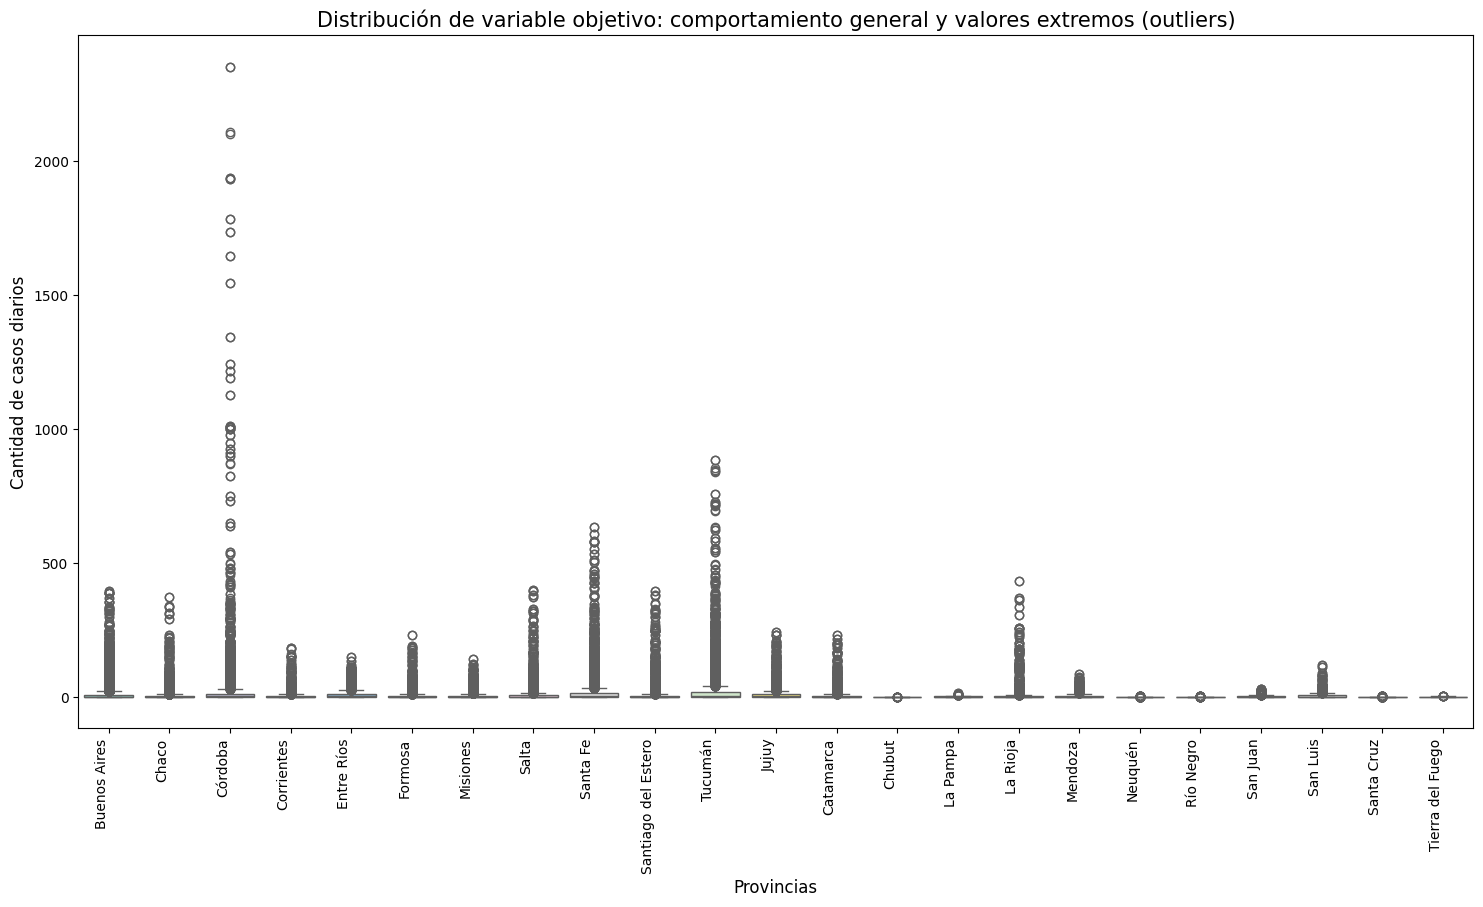

In [40]:
plt.figure(figsize=(18, 9))
sns.boxplot(data=df,x="provincia",y="cant_casos",palette="Set3")
plt.title("Distribución de variable objetivo: comportamiento general y valores extremos (outliers)", fontsize=15)
plt.xlabel("Provincias", fontsize=12)
plt.ylabel("Cantidad de casos diarios", fontsize=12)
plt.xticks(rotation=90, ha="right")
plt.show()

- **INSIGHT CLAVE:** Se observan valores extremos y puede deberse a que durante determinadas Semanas Epidemiológicas se dieron las condiciones adecuadas para un pico de contagios (epidemia). La variable presenta una distribución asimétrica con presencia de valores extremos, característica habitual en datos epidemiológicos, por lo tanto son registros fundamentales para nuestro análisis

In [41]:
# Filtra por registros de casos mayores a 100

df_outliers = df[df["cant_casos"] > 100]
df_outliers["incidencia"] = ((df_outliers["cant_casos"] / df_outliers["cant_habitantes"]) * 100000)

C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\1325742660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers["incidencia"] = ((df_outliers["cant_casos"] / df_outliers["cant_habitantes"]) * 100000)


C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\2965693344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\2965693344.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


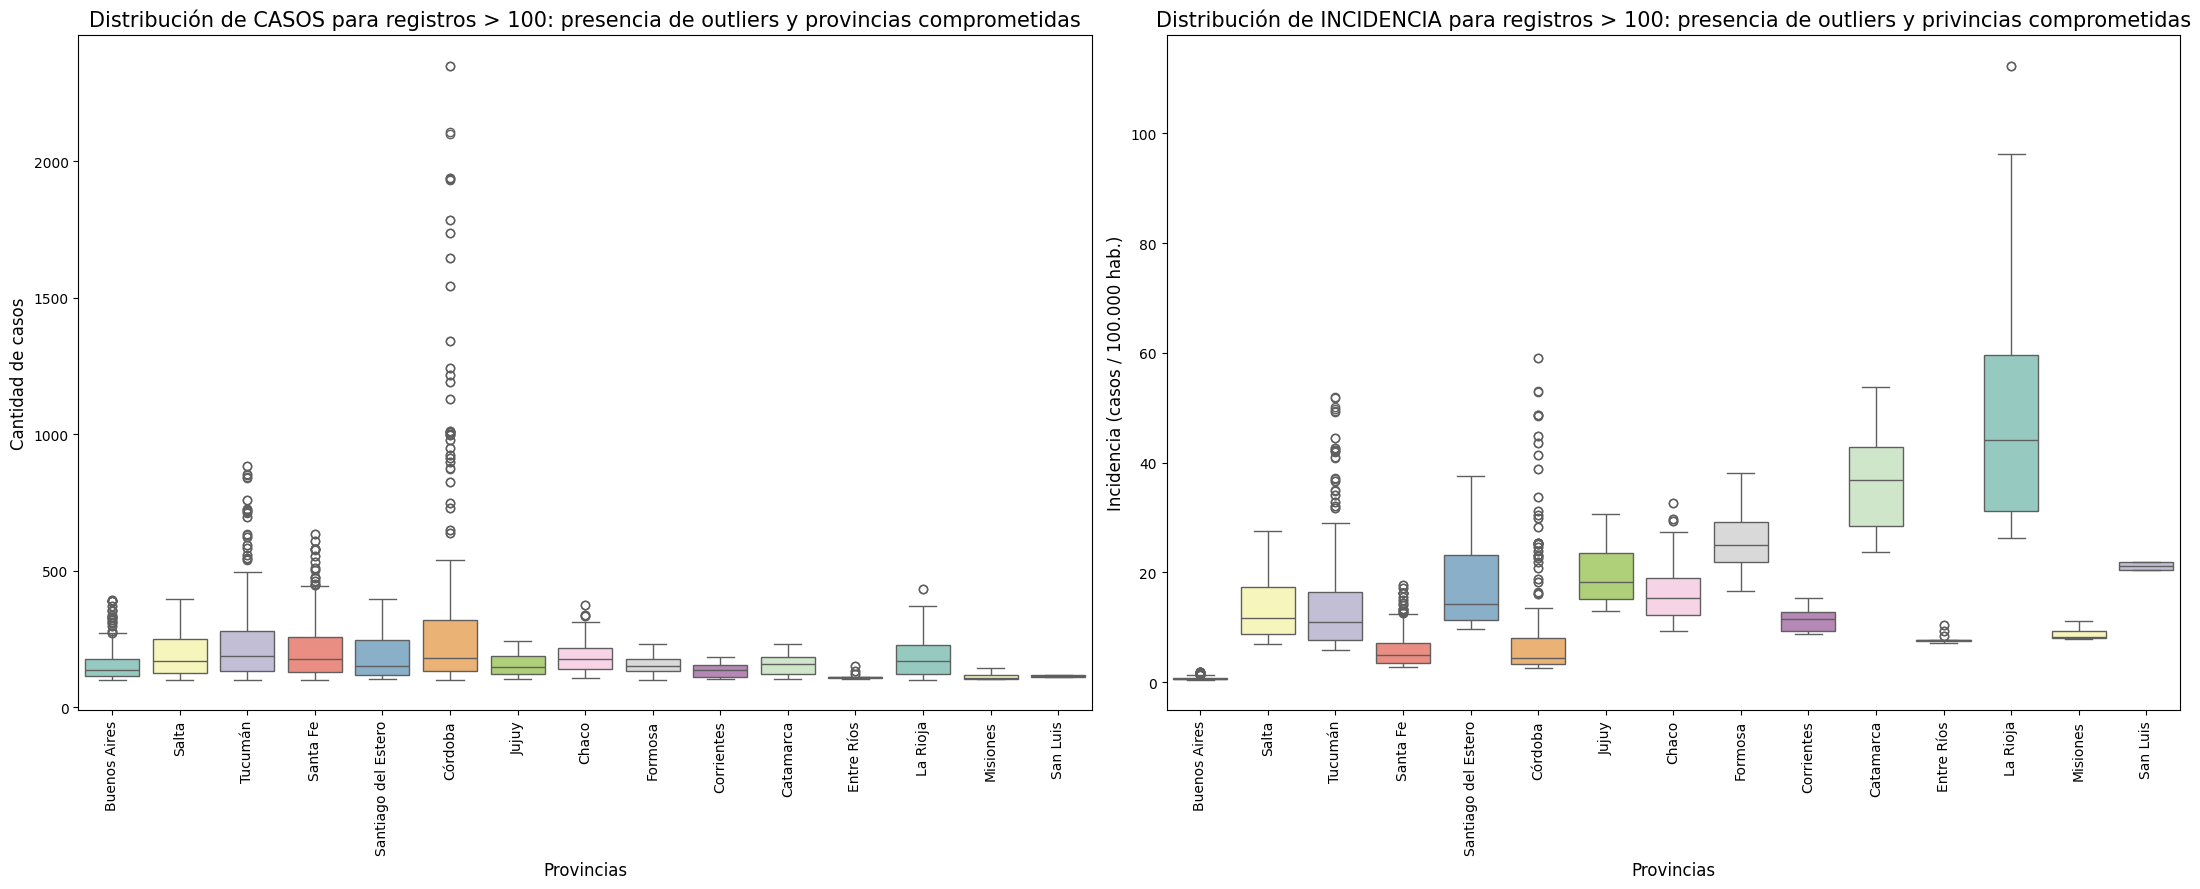

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(22, 9), sharex=True)

# Boxplot de cantidad de casos
sns.boxplot(
    data=df_outliers,
    x="provincia",
    y="cant_casos",
    palette="Set3",
    ax=axes[0]

)

axes[0].set_title("Distribución de CASOS para registros > 100: presencia de outliers y provincias comprometidas", fontsize=15)
axes[0].set_xlabel("Provincias", fontsize=12)
axes[0].set_ylabel("Cantidad de casos", fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Boxplot de incidencia
sns.boxplot(
    data=df_outliers,
    x="provincia",
    y="incidencia",
    palette="Set3",
    ax=axes[1]
)

axes[1].set_title("Distribución de INCIDENCIA para registros > 100: presencia de outliers y privincias comprometidas", fontsize=15)
axes[1].set_xlabel("Provincias", fontsize=12)
axes[1].set_ylabel("Incidencia (casos / 100.000 hab.)", fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

- **INSIGHT CLAVE:** Córdoba, tucumán y Santa Fe son las provincias con mayor cantidad de posibles brotes epidémicos (outliers), confirmándose con el segundo gráfico. Esto puede deberse a condiciones ambientales óptimas (temperatura y precipitaciones acumuladas, entre otras), en conjunto con medidas socio-culturales mínimas o inexistentes (medidas preventivas, eliminación de criaderos, educación, entre otras), combo que podría dar lugar a estos eventos.

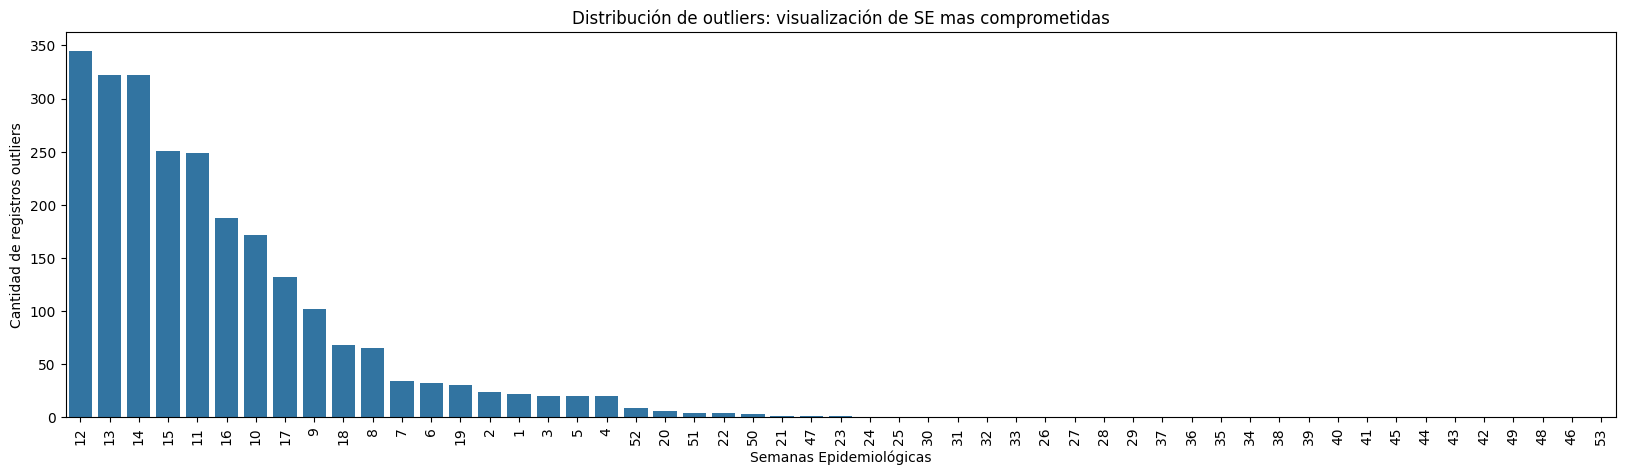

In [43]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x="SE",data=df_outliers,order=df_outliers["SE"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribución de outliers: visualización de SE mas comprometidas")
plt.ylabel("Cantidad de registros outliers")
plt.xlabel("Semanas Epidemiológicas")

plt.show()



- **INSIGHT CLAVE:** Semana epidemiológica 12 es donde posiblemente existen mayor cantidad de brotes epidémicos. Relacionándose esto con un mes donde las condiciones ambientales para la transmisión de la enfermedad son consideradas óptimas (precipitaciones acumuladas, temperaturas, entre otras)

## **3.3. Distribución geográfica**

### **3.3.1. Distribución absoluta por departamentos principales**

El departamento en el que mas registros hubo es CAPITAL



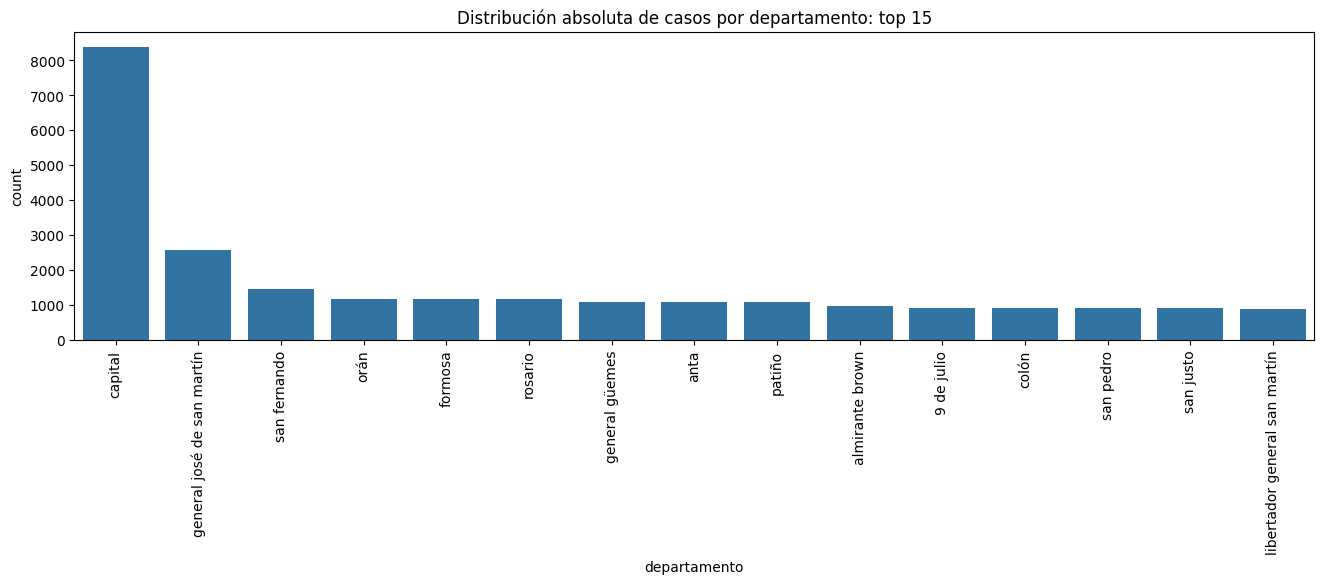

In [44]:
print(f'El departamento en el que mas registros hubo es {df["departamento"].mode()[0].upper()}\n')

fig = plt.figure(figsize=(16,4))
ax = plt.axes()
ax = sns.countplot(x="departamento",data=df,order=df["departamento"].value_counts()[:15].index)
plt.xticks(rotation=90)
plt.title("Distribución absoluta de casos por departamento: top 15")

plt.show()

### **3.3.2. Distribución absoluta por provincias**

La provincia donde mas registros hubo es BUENOS AIRES



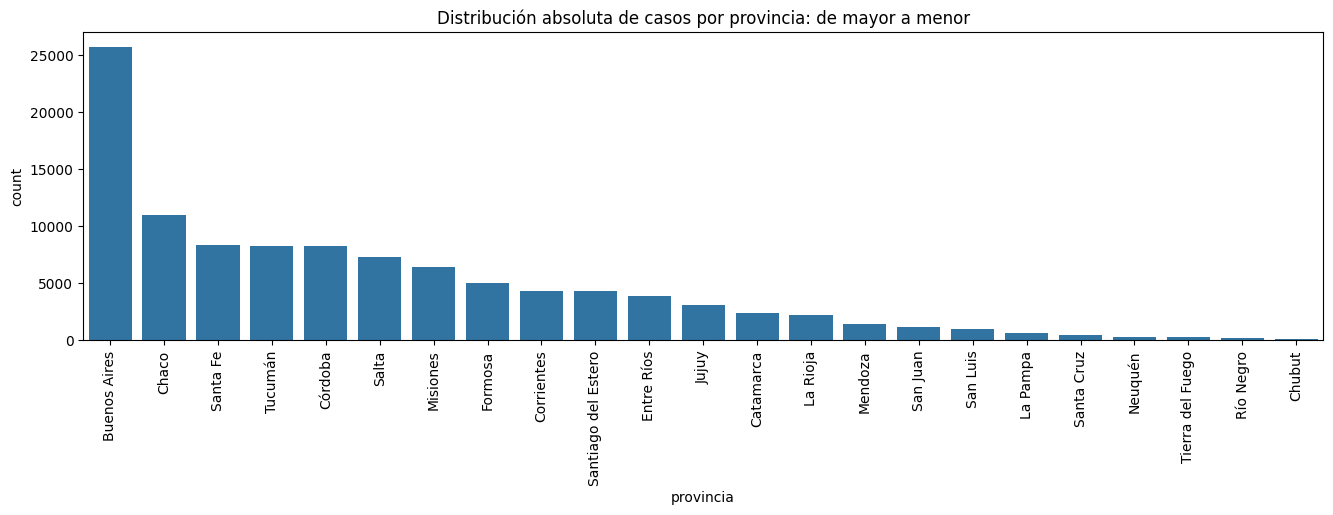

In [45]:
print(f'La provincia donde mas registros hubo es {df["provincia"].mode()[0].upper()}\n')

fig = plt.figure(figsize=(16,4))
ax = plt.axes()
ax = sns.countplot(x="provincia",data=df,order=df["provincia"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribución absoluta de casos por provincia: de mayor a menor")

plt.show()

- **INSIGHT CLAVE:** Vemos que **Buenos Aires** es la provincia donde más registros de casos hubo. Pero también sabemos que es la que tiene mayor cantidad de habitantes, por lo que mas adelante vamos a explorar en terminos de tasa de incidencia por cada 100.000 habitantes para igualar las condiciones entre provincias con menor población

In [46]:
df[["departamento","provincia"]].describe()

,departamento,provincia
count,105275,106279
unique,420,23
top,capital,Buenos Aires
freq,8387,25741


## **3.4. Distribución temporal de los casos**

El año donde se registraron mayor cantidad de casos es 2024



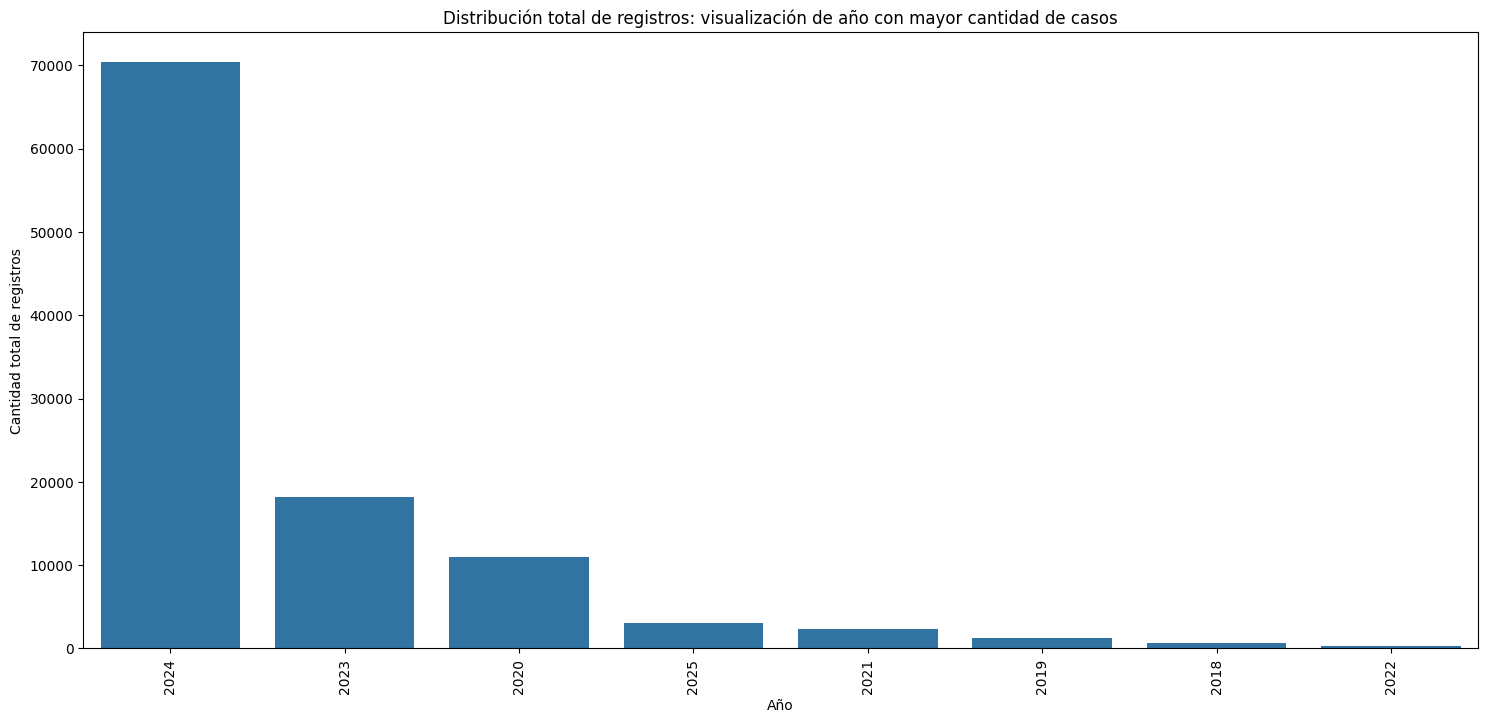

In [47]:
print(f'El año donde se registraron mayor cantidad de casos es {df["año"].mode()[0]}\n')

fig = plt.figure(figsize=(18,8))
ax = plt.axes()
ax = sns.countplot(x="año",data=df,order=df["año"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Año")
plt.ylabel("Cantidad total de registros")
plt.title("Distribución total de registros: visualización de año con mayor cantidad de casos")

plt.show()

- **INSIGHT CLAVE:** Podemos observar como la distribución de los casos fue incrementandose hacia el 2024 (mayor cantidad de registros), pero en 2021 y 2022 no siguen este mismo patrón. Por ende, puede suponerse que este patrón de registros pudo verse interrumpido por el efecto de la pandemia COVID, en el período 04/2020 - 04/2022, donde el sistema de salud enfocó sus esfuerzos pura y exclusivamente, sumado esto al aislamiento social y medidas preventivas implementadas. Con respecto a los registros en el año 2025 podemos suponer que todavia quedan registros por cargar hasta que finalice el año

## **3.5. Funcion auxiliar**

*Nota: función utilizada para el cálculo de indicadores epidemiológicos, agrupaciones, visualizaciones y análisis posteriores.*

In [48]:
df_agrup_acum = df.copy()

#Cálculo de incidencia y su logaritmo para agregar como variables al nuevo DF
df_agrup_acum["incidencia"] = df_agrup_acum["cant_casos"] / df_agrup_acum["cant_habitantes"] * 100000
df_agrup_acum["incidencia_log"] = np.log1p(df_agrup_acum["incidencia"])

In [49]:
def eda_agrupado(
    df_agrup_acum,
    grupo,
    agregaciones,
    round_cols=None,
    round_decimals=2,
    sort_by=None,
    ascending=False
):
    """
    Agrupa un dataset epidemiológico y calcula métricas agregadas.

    Parámetros:

    DataFrame
    grupo (string o lista):
        Variables de agrupación (ejemplo: 'SE', ['SE', 'provincia'])
    agregaciones (diccionario):
        {'variable': 'funcion'}

    Retorna el nuevo DataFrame
    
    """
    df = (
        df_agrup_acum
        .groupby(grupo)
        .agg(agregaciones)
        .reset_index()
    )

    if round_cols:
        df[round_cols] = df[round_cols].round(round_decimals)

    if sort_by:
        df = df.sort_values(by=sort_by, ascending=ascending)

    return df

## **3.6. Distribución de casos acumulados por rangos etarios**


In [50]:
#Dataframe con incidencia acumulada por cada grupo etario

agregaciones = {
    "incidencia": "sum"
}

df_grupos_etarios = eda_agrupado(
    df_agrup_acum,
    grupo="grupo_edad",
    agregaciones=agregaciones,
    sort_by="incidencia",
    ascending=False
)

df_grupos_etarios = df_grupos_etarios.reset_index().drop(columns="index")

C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\3703066413.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(grupo)


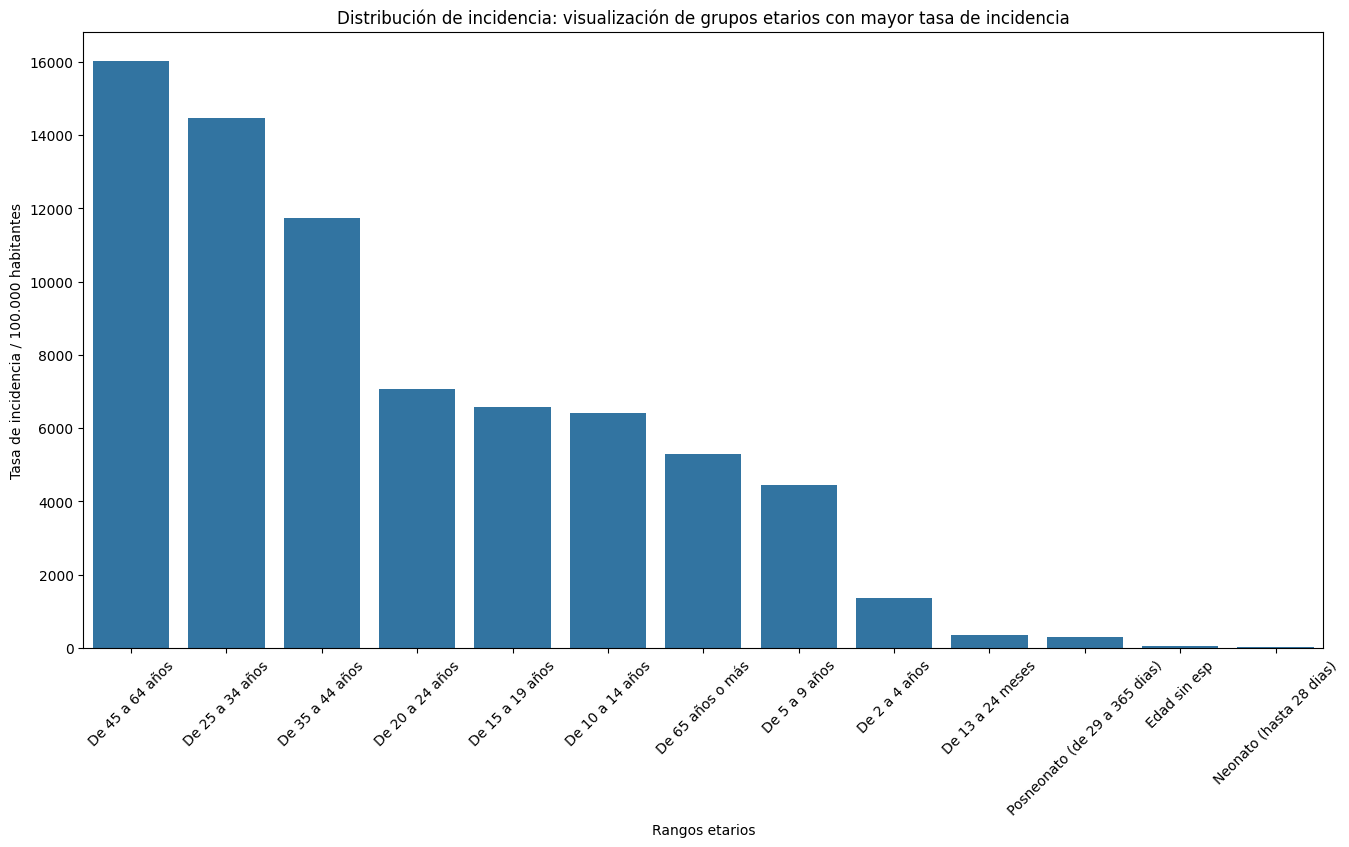

In [51]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_grupos_etarios, x="grupo_edad", y="incidencia",order=df_grupos_etarios["grupo_edad"])
plt.xticks(rotation=45)
plt.ylabel("Tasa de incidencia / 100.000 habitantes")
plt.xlabel("Rangos etarios")
plt.title("Distribución de incidencia: visualización de grupos etarios con mayor tasa de incidencia")
plt.show()

- **INSIGHT CLAVE:** De esta forma queda en evidencia el grupo etario mas comprometido. Sabemos que la enfermedad afecta de distinta forma a niños y personas de mayor edad, y mediante el gráfico, se observa que para personas de entre 64 años o más así como para niños de entre 0 y 9 años (grupos de riesgo), la incidencia es menor. Esto puede deberse a que las medidas preventivas (uso de repelentes, eliminación de criaderos, uso de mosquiteros, desmalezado, entre otras) son acatadas por grupos familiares formados por personas en estos grupos de edad

## **3.7. Análisis de incidencia epidemiológica**

### **3.7.1. Análisis geográfico de tasa de incidencia acumulada**

In [52]:
#Dataframe filtrado que muestra los casos totales sumados y tasa de incidencia para cada provincia utilizando el registro completo de datos

agregaciones = {
    "cant_casos": "sum",
    "incidencia": "sum"
}

df_tasa_incidencia = eda_agrupado(
    df_agrup_acum,
    grupo="provincia",
    agregaciones=agregaciones,
    sort_by="incidencia",
    ascending=False
)

#Incorporar columna con porcentajes de incidencia para representar gráficamente los valores de cada provincia
df_tasa_incidencia["porcentaje_incidencia"] = (df_tasa_incidencia["incidencia"] * 100 / df_tasa_incidencia["incidencia"].sum())
df_tasa_incidencia = df_tasa_incidencia.reset_index().drop(columns="index")

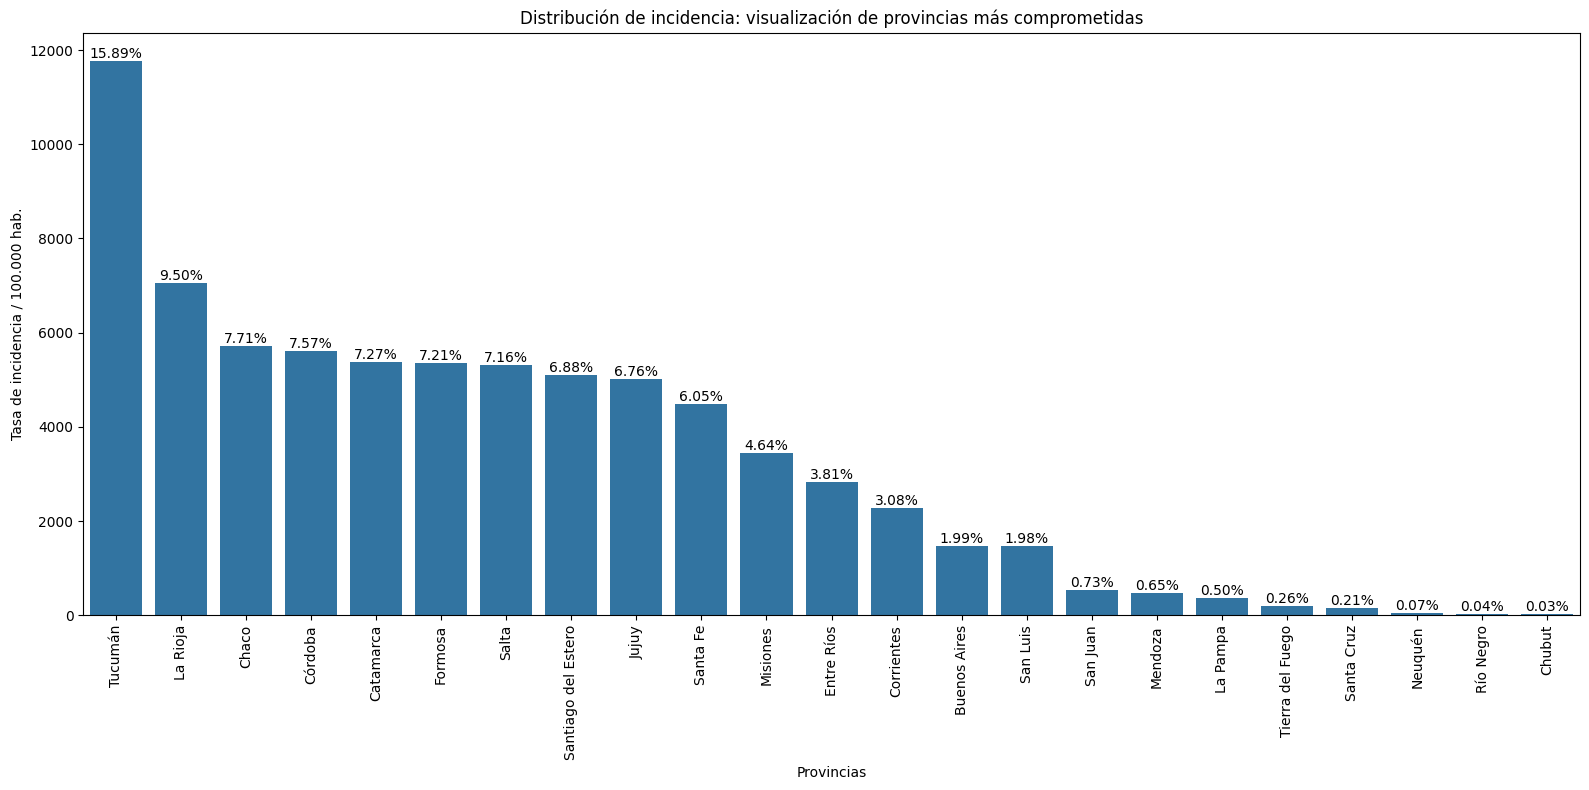

In [53]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes()

sns.barplot(data=df_tasa_incidencia,x="provincia", y="incidencia",order=df_tasa_incidencia["provincia"],ax=ax)

for i, row in df_tasa_incidencia.iterrows():
    ax.text(
        i,
        row["incidencia"],
        f"{row['porcentaje_incidencia']:.2f}%",
        ha='center',
        va='bottom')

plt.xticks(rotation=90)
plt.title("Distribución de incidencia: visualización de provincias más comprometidas")
plt.ylabel("Tasa de incidencia / 100.000 hab.")
plt.xlabel("Provincias")
plt.tight_layout()
plt.show()

- **INSIGHT CLAVE:** Con la premisa de que la incidencia es el indicador clave para evaluar la gravedad epidemiológica territorial, se observa que el riesgo de transmisión es mucho mayor en provincias como Tucumán, La Rioja, Chaco, Córdoba, Catamarca, Formosa, entre otras, con respecto a Buenos Aires. Deberían reforzarse las acciones y medidas preventivas, educativas y de concientización en las provincias mas comprometidas con el fin de disminuir el riesgo de contagio, ya que las condiciones ambientales en estos territorios son las adecuadas para el desarrollo del ciclo vital del vector

### **3.7.2. Análisis temporal de tasa de incidencia acumulada**

In [54]:
##Dataframe que agrupa casos acumulados por SE para todo el registro

agregaciones = {
    "incidencia" : "sum"
}

df_se = eda_agrupado(
    df_agrup_acum,
    grupo="SE",
    agregaciones=agregaciones,
    sort_by="SE",
    ascending=True
)

C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\3703066413.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(grupo)



DISTRIBUCIÓN DE INCIDENCIA: COMPORTAMIENTO TEMPORAL DE LA ENFERMEDAD EN LAS DIFERENTES PROVINCIAS ARGENTINAS


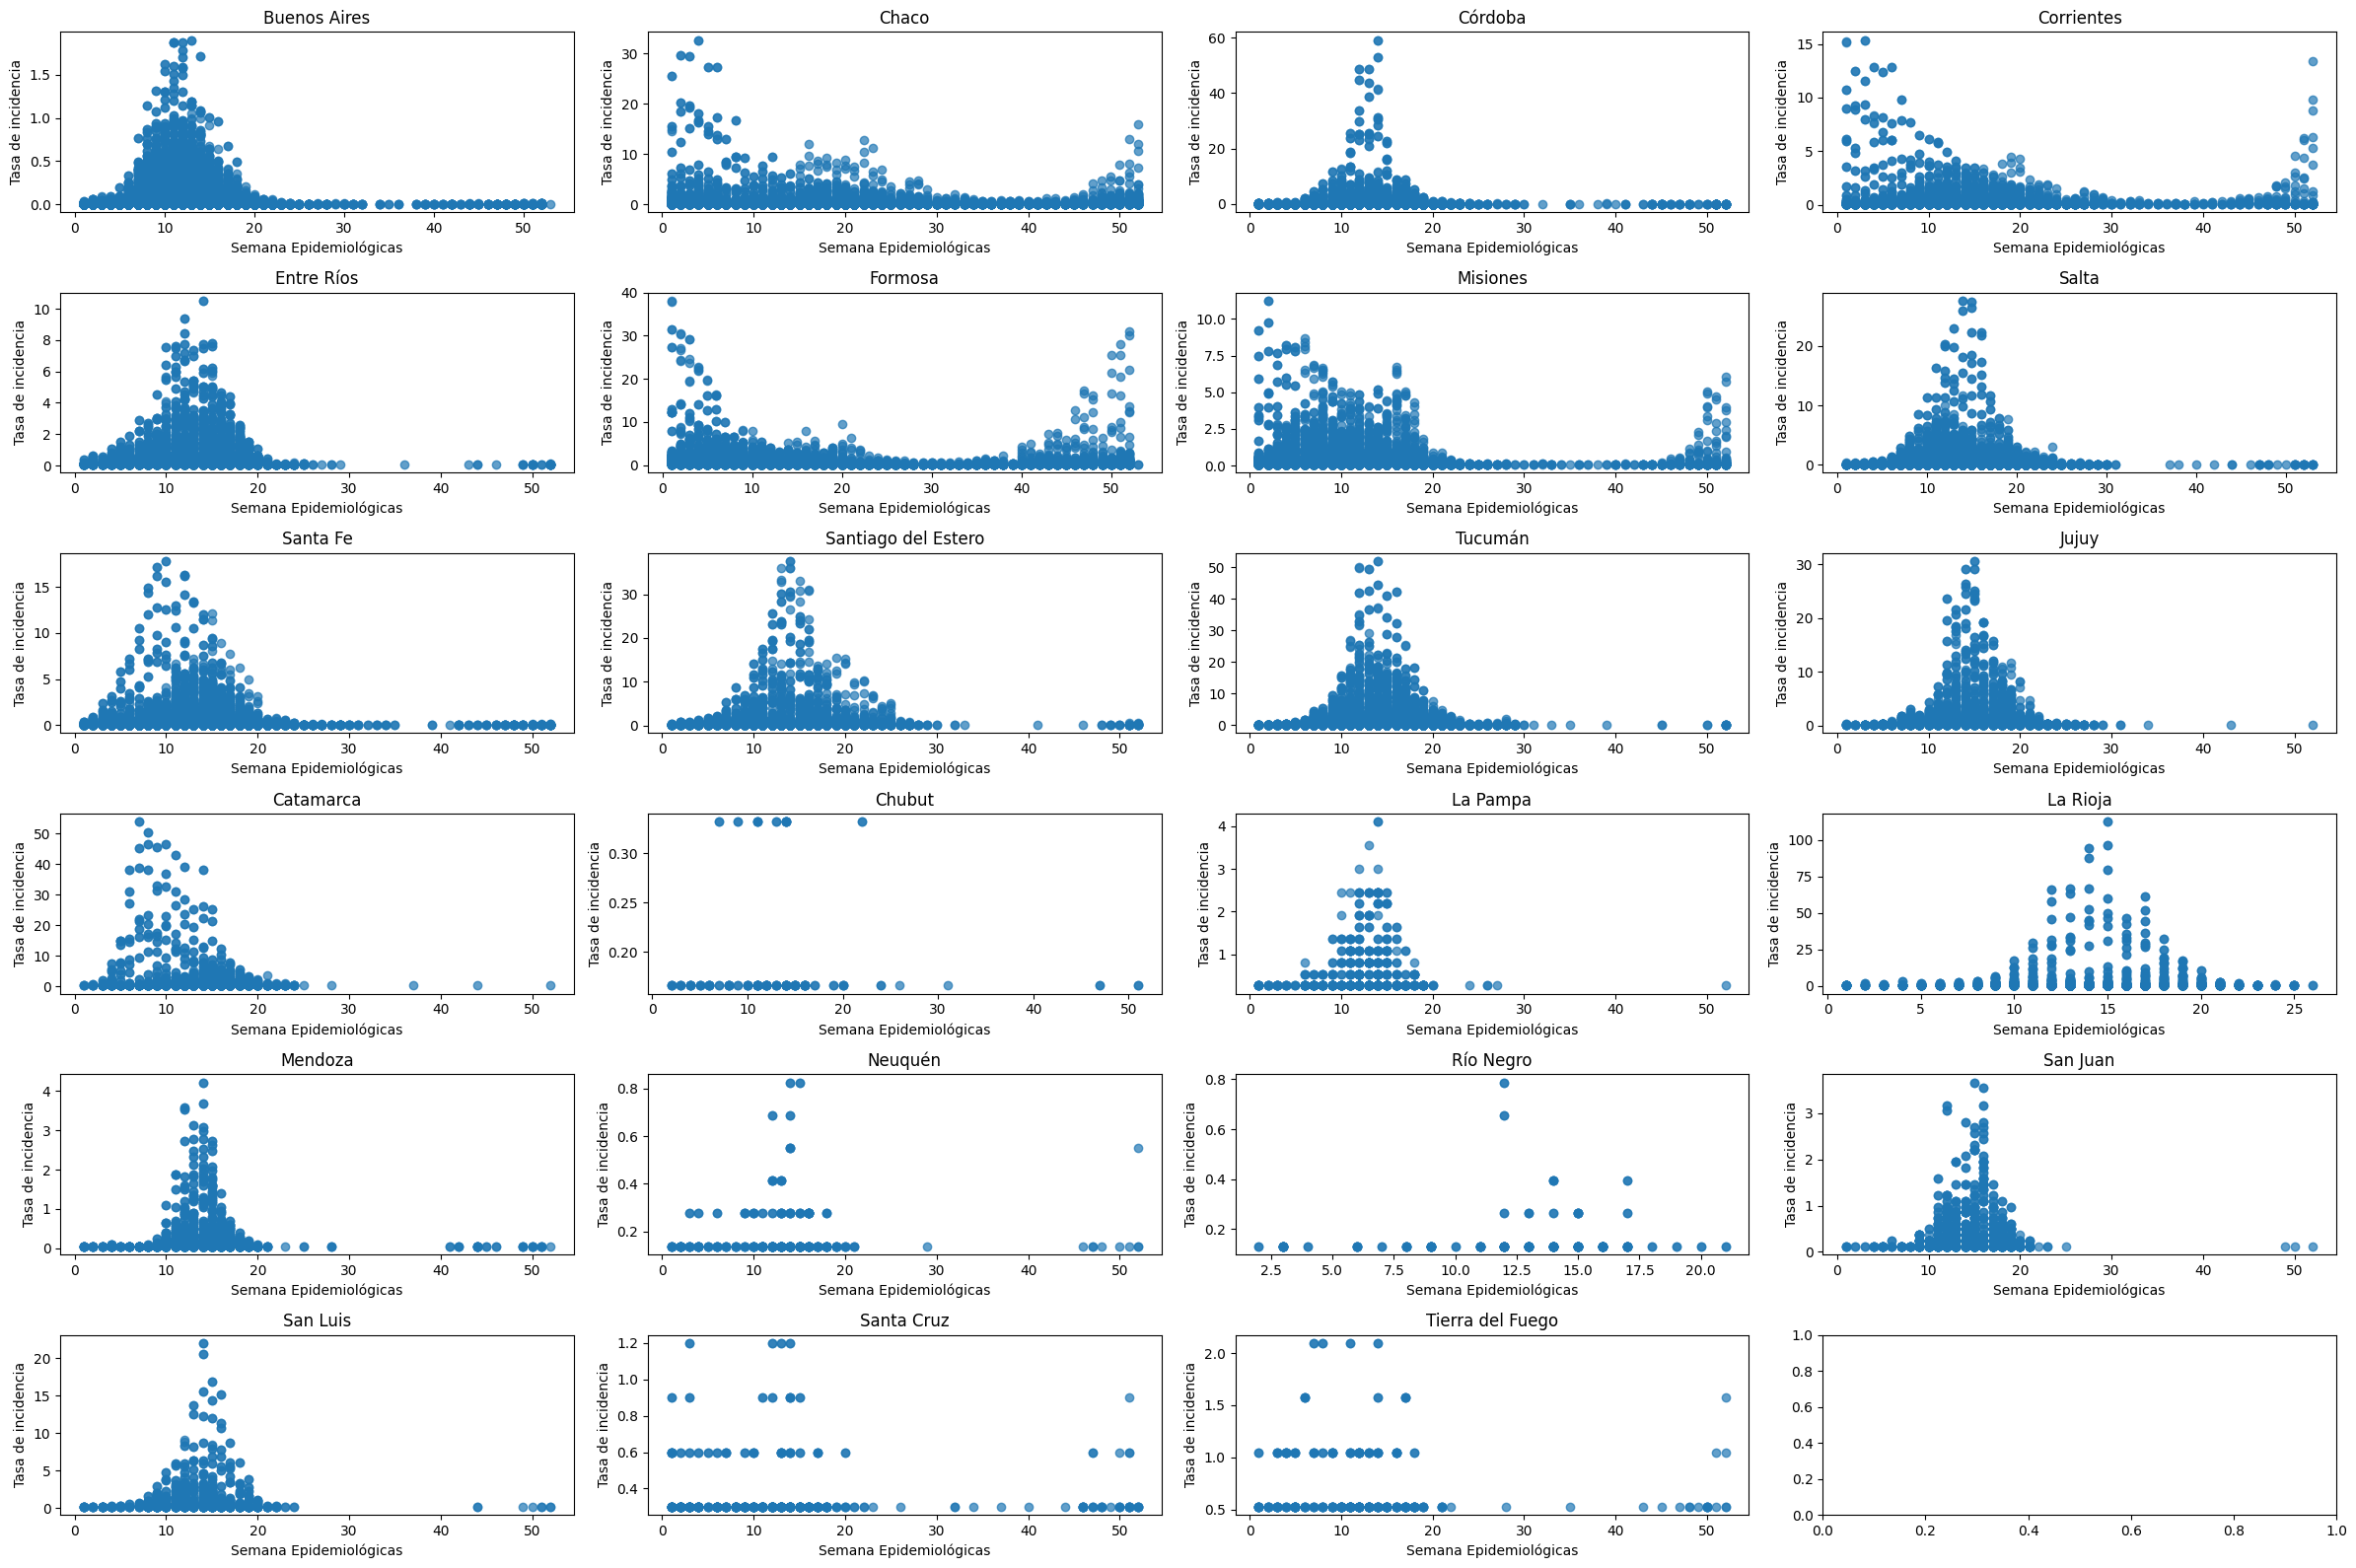

In [55]:
provincias = df_agrup_acum['provincia'].dropna().unique()
n = len(provincias)

print("\nDISTRIBUCIÓN DE INCIDENCIA: COMPORTAMIENTO TEMPORAL DE LA ENFERMEDAD EN LAS DIFERENTES PROVINCIAS ARGENTINAS")
fig, axes = plt.subplots(nrows=(n//4)+1, ncols=4, figsize=(24, 16))
axes = axes.flatten()

for ax, prov in zip(axes, provincias):
    df_provincias = df_agrup_acum[df_agrup_acum["provincia"] == prov]
    ax.scatter(df_provincias["SE"], df_provincias["incidencia"], alpha=0.7)
    ax.set_title(prov)
    ax.set_xlabel("Semana Epidemiológicas")
    ax.set_ylabel("Tasa de incidencia")

plt.tight_layout()
plt.show()

- **INSIGHT CLAVE:** Como primera aproximación en cuanto a variables ambientales, a partir del gráfico podemos deducir que en provincias donde la temperatura se mantiene constante (norte/noreste del pais), se registran casos durante todo el año. Esto quiere decir que el ciclo vital del mosquito no se interrumpe y los contagios se mantienen durante los meses más fríos. Caso contrario ocurre en el resto de las provincias, donde el frío interrumpe el ciclo de vida del vector, evidenciandose con registros escasos o nulos

In [56]:
#Dataframe filtrado de incidencia acumuada, temperatura media por semanas epidemiológicas

agregaciones = {
    "temp_media" : "mean",
    "incidencia" : "sum"
}

df_se_bsas = eda_agrupado(
    df_agrup_acum[df_agrup_acum["provincia"] == "Buenos Aires"],
    grupo="SE",
    agregaciones=agregaciones,
    sort_by="SE",
    ascending=True
)

C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\3703066413.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(grupo)


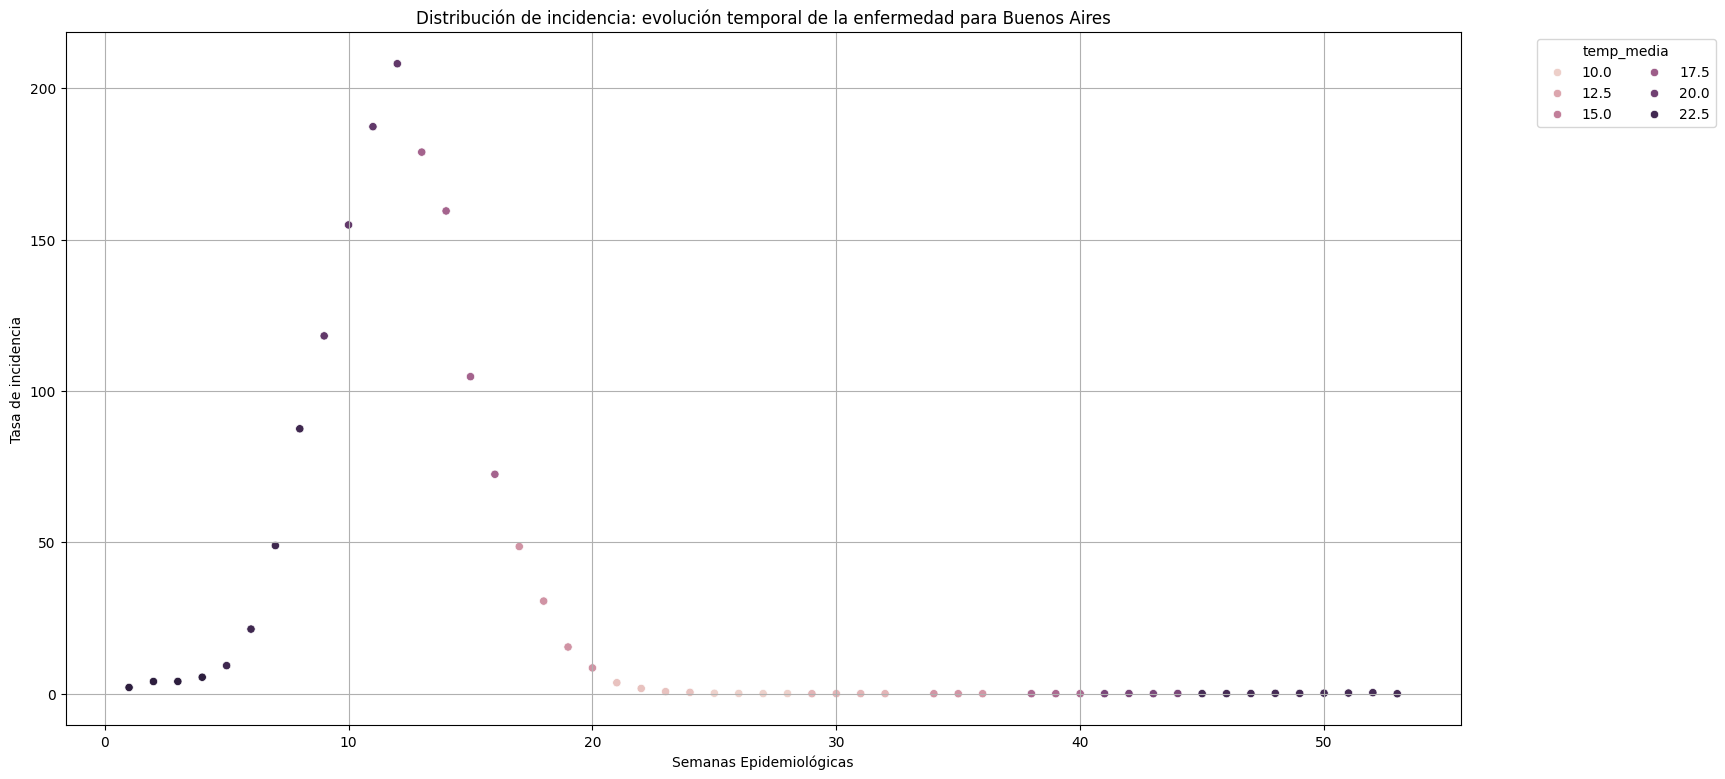

In [57]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=df_se_bsas, x="SE", y="incidencia", alpha=1, hue="temp_media")

plt.title("Distribución de incidencia: evolución temporal de la enfermedad para Buenos Aires")
plt.xlabel("Semanas Epidemiológicas")
plt.ylabel("Tasa de incidencia")
plt.legend(title='temp_media', bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
plt.grid(True)
plt.show()

- **INSIGHT CLAVE:** Se observa el pico de incidencia entre las SE 7 y 20 (14 aprox.), coincidiendo el aumento de casos con el incremento de la temperatura media semanal, y disminuyendo a medida que los meses son más fríos. El ciclo biológico del vector está directamente relacionado con el incremento sostenido de la temperatura y la disponibilidad de agua, entre otros factores ambientales. De esta forma sabremos que previo a estas semanas epidemiológicas tendremos que fortalecer las medidas de prevención (eliminación de criaderos de mosquitos, desmalezado, entre otras) para evitar la transmision de la enfermedad. *ACLARACIÓN: se tomó como ejemplo la provincia de Buenos Aires ya que la misma cuenta con una buena cantidad de registros, diferencias marcadas de temperaturas medias entre invierno y verano, lo que permite evidenciar el comportamiento temporal de la enfermedad.*





### **3.7.3. Análisis temporal comparativo: incidencia acumulada por regiones para 2023 y 2024**

In [58]:
#Dataset filtrado por provincia e incidencia para el año 2023

agregaciones = {
    "incidencia": "sum"
}

inc_prov_2023 = eda_agrupado(
    df_agrup_acum[df_agrup_acum["año"] == 2023],
    grupo="provincia",
    agregaciones=agregaciones,
    sort_by="incidencia",
    ascending=False
)

In [59]:
#Dataset filtrado por provincia e incidencia para el año 2024

agregaciones = {
    "incidencia": "sum"
}

inc_prov_2024 = eda_agrupado(
    df_agrup_acum[df_agrup_acum["año"] == 2024],
    grupo="provincia",
    agregaciones=agregaciones,
    sort_by="incidencia",
    ascending=False
)

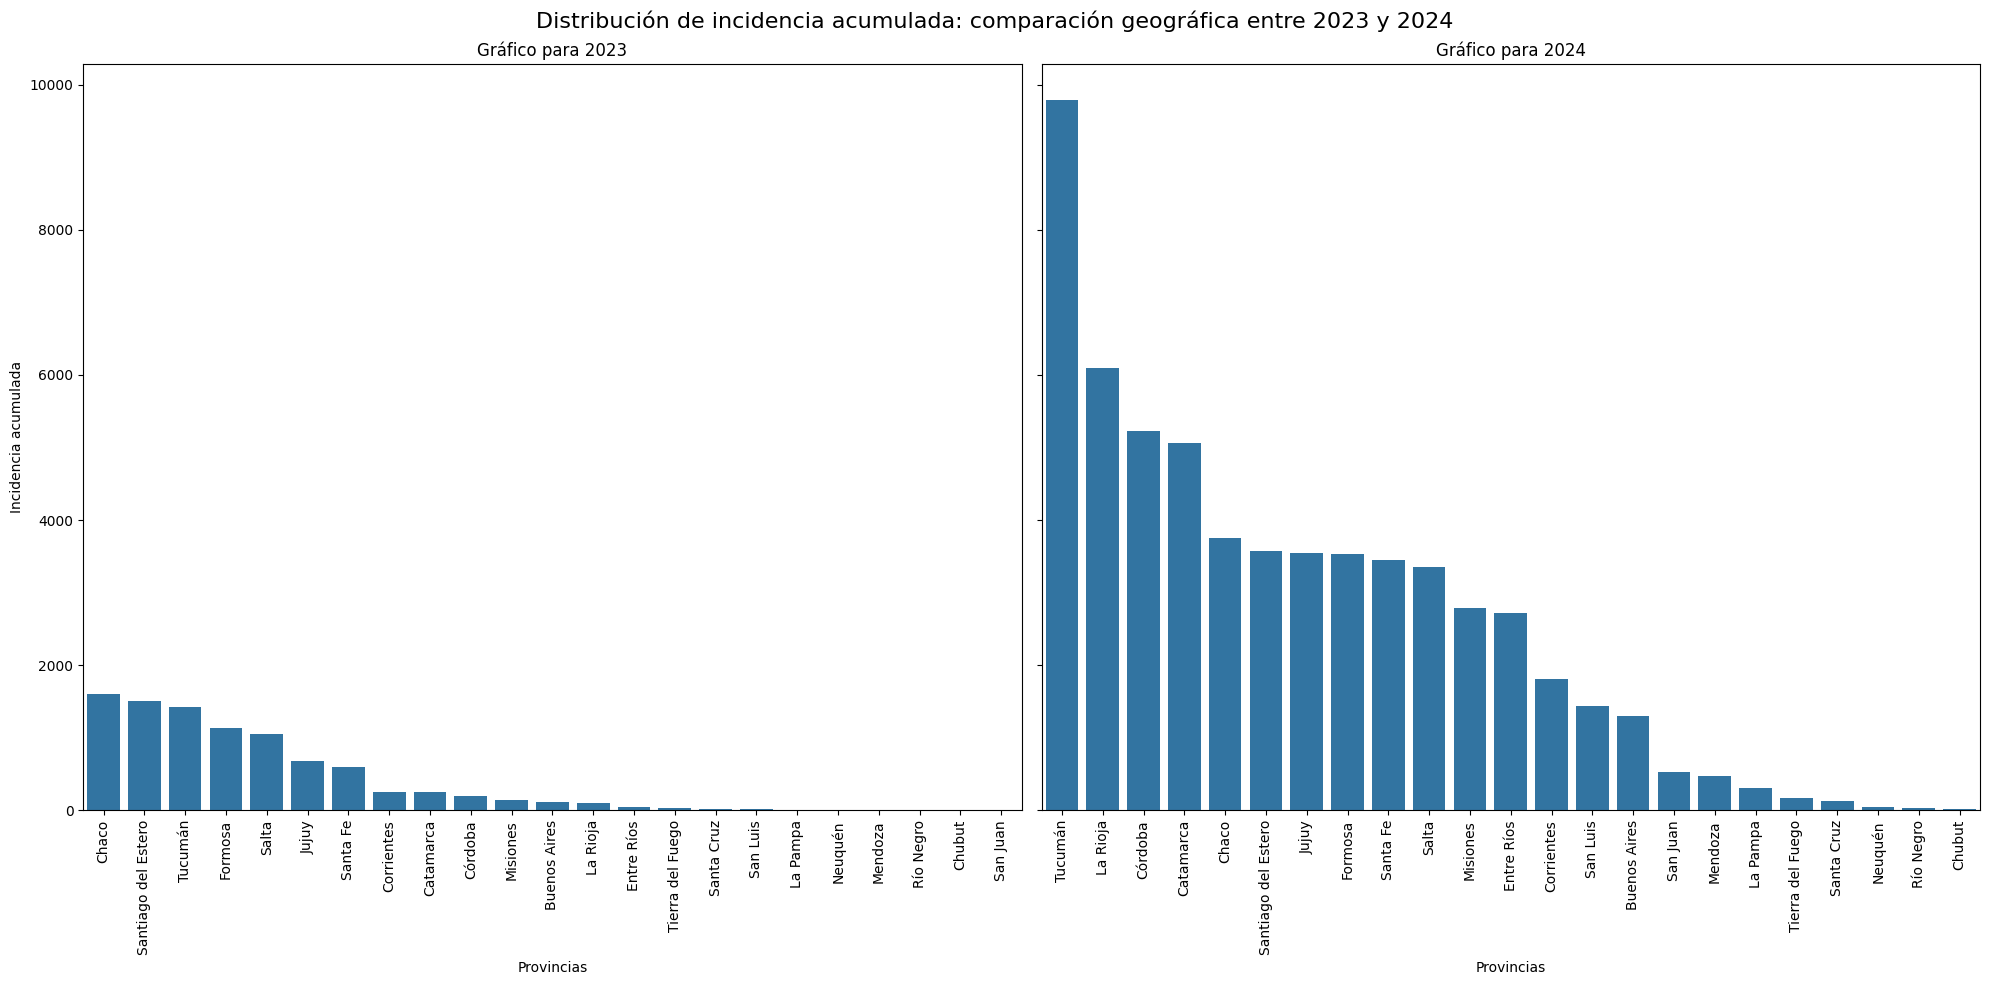

In [60]:
#Gráficos de comparación

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Gráfico 2023
sns.barplot(data=inc_prov_2023, x='provincia', y='incidencia', order=inc_prov_2023["provincia"], ax=axes[0])
axes[0].set_title("Gráfico para 2023")
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel("Incidencia")
axes[0].set_xlabel("Provincias")

# Gráfico 2024
sns.barplot(data=inc_prov_2024, x='provincia', y='incidencia', order=inc_prov_2024["provincia"], ax=axes[1])
axes[1].set_title("Gráfico para 2024")
axes[1].tick_params(axis='x', rotation=90)
axes[0].set_ylabel("Incidencia acumulada")
axes[0].set_xlabel("Provincias")

fig.suptitle("Distribución de incidencia acumulada: comparación geográfica entre 2023 y 2024", fontsize=16)
plt.ylabel("Incidencia")
plt.xlabel("Provincias")
plt.tight_layout()
plt.show()

- **INSIGHT CLAVE:** Retomando el análisis temporal incluímos como variable target la incidencia acumulada y vemos una muestra mayor intensidad de transmisión viral a nivel nacional durante 2024, evidenciando un escenario epidemiológico de mayor riesgo con respecto al año anterior, dando una pauta de que se necesita de forma urgente fortalecer la vigilancia, intensificar las acciones de prevención y reforzar las estrategias de control vectorial para mitigar futuros brotes.

### **3.7.4 Análisis compararativo: evolución temporal (SE) de incidencia acumulada para 2023 y 2024**

In [61]:
#Dataset de incidencia acumulada por semanas epidemiologicas para 2023 y 2024

agregaciones = {
    "incidencia": "sum",
}

inc_SE_2023 = eda_agrupado(
    df_agrup_acum[df_agrup_acum["año"] == 2023],
    grupo="SE",
    agregaciones=agregaciones,
    sort_by="SE",
    ascending=True
).rename(columns=lambda c: f"{c}_2023" if c != "SE" else c)

inc_SE_2024 = eda_agrupado(
    df_agrup_acum[df_agrup_acum["año"] == 2024],
    grupo="SE",
    agregaciones=agregaciones,
    sort_by="SE",
    ascending=True
).rename(columns=lambda c: f"{c}_2024" if c != "SE" else c)

assert inc_SE_2023["SE"].equals(inc_SE_2024["SE"])
inc_SE_2023_2024 = inc_SE_2023.merge(inc_SE_2024, on="SE", how="left")

C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\3703066413.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(grupo)
C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\3703066413.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(grupo)


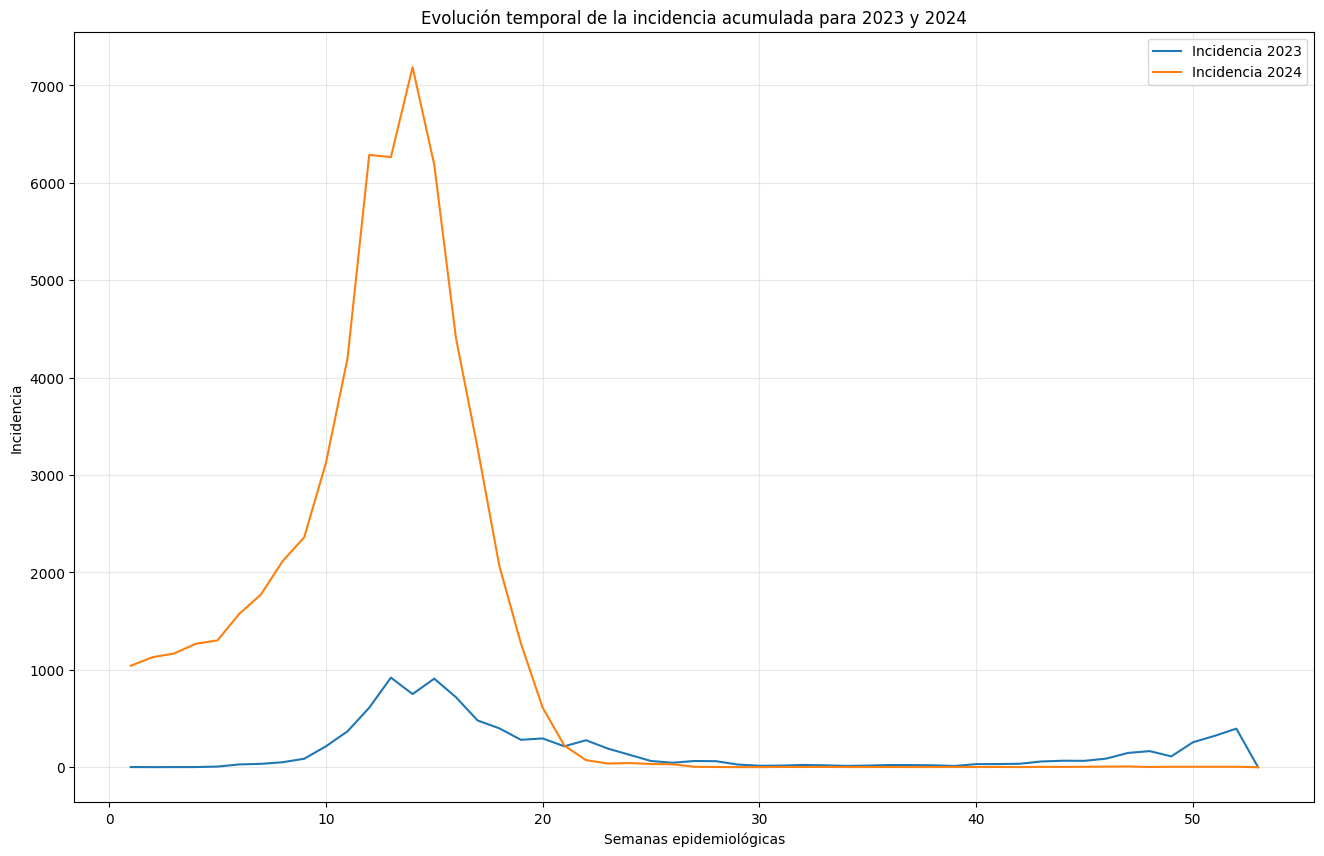

In [62]:
fig, axes = plt.subplots(figsize=(16,10), sharex=True)

# Gráfico: Incidencia

sns.lineplot(
    data=inc_SE_2023_2024,
    x="SE",
    y="incidencia_2023",
    label="Incidencia 2023",
)
sns.lineplot(
    data=inc_SE_2023_2024,
    x="SE",
    y="incidencia_2024",
    label="Incidencia 2024",
)

plt.title("Evolución temporal de la incidencia acumulada para 2023 y 2024")
plt.xlabel("Semanas epidemiológicas")
plt.ylabel("Incidencia")
plt.grid(alpha=0.3)
plt.legend()

- **INSIGHT CLAVE:** Se confirma la tendencia de aumento de tasa de incidencia por semanas epidemiológicas para 2024 con respecto a 2023 y la necesidad urgente de implementar estrategias de prevención.

#### Conclusión sobre la comparación entre 2023 y 2024

 Para evaluar el aumento de dengue entre 2023 y 2024 y fundamentar la necesidad de intensificar medidas de prevención, la incidencia resulta el indicador más apropiado, ya que permite comparar el riesgo poblacional entre años de manera directa y controlando por el tamaño de la población. Si bien la cantidad de casos absolutos refleja la carga sobre el sistema de salud, no permite inferir cambios en el riesgo de enfermar

### **3.7.5. Análisis de tendencia entre variables climáticas e incidencia acumulada**


In [63]:
agregaciones = {
    "temp_media": "mean",
    "precip_media": "mean",
    "hum_rel": "mean",
    "dias_pp>1mm": "mean",
    "incidencia": "sum",
    "incidencia_log": "sum"
}

df_var_amb = eda_agrupado(
    df_agrup_acum,
    grupo=["SE","provincia"],
    agregaciones=agregaciones,
    round_cols=["temp_media","precip_media","hum_rel","dias_pp>1mm"],
    sort_by="incidencia",
    ascending=False
)

df_var_amb = df_var_amb.reset_index().drop(columns="index").dropna()

C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\3703066413.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(grupo)


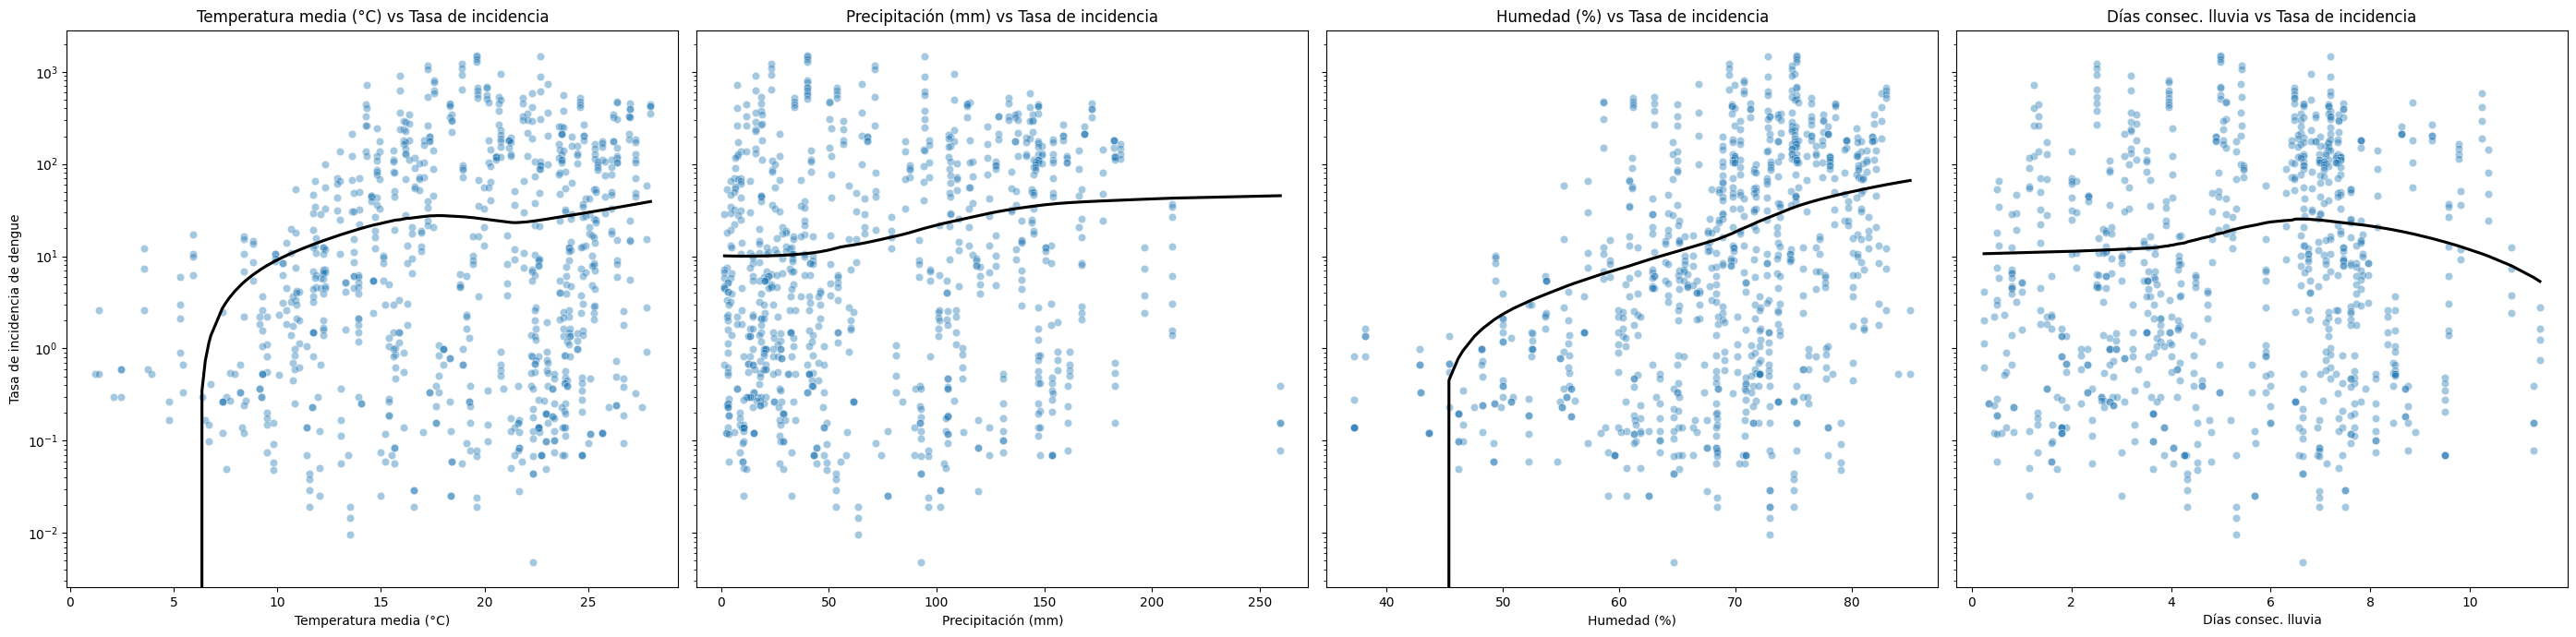

In [64]:
_fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)

variables = [
    ("temp_media", "Temperatura media (°C)"),
    ("precip_media", "Precipitación (mm)"),
    ("hum_rel", "Humedad (%)"),
    ("dias_pp>1mm", "Días consec. lluvia")
]

for ax, (var, label) in zip(axes, variables):
    # puntos que representan a las distintas provincias
    sns.scatterplot(
        data=df_var_amb,
        x=var,
        y="incidencia",
        ax=ax,
        alpha=0.4
    )

    # línea de tendencia
    sns.regplot(
        data=df_var_amb,
        x=var,
        y="incidencia",
        ax=ax,
        scatter=False,
        lowess=True,      # suavizado no lineal (clave en dengue)
        color="black"
    )

    ax.set_xlabel(label)
    ax.set_title(f"{label} vs Tasa de incidencia")

axes[0].set_ylabel("Tasa de incidencia de dengue")

plt.yscale("log") #Demuestra la verdaddera forma en la que se distribuyen los datos permitiendo hacer visible su tendencia
plt.tight_layout()
plt.show()

- **INSIGHT CLAVE:** Las líneas de tendencia muestran que la relación entre variables ambientales y la incidencia de dengue es predominantemente no lineal, con la presencia de umbrales y efectos de saturación. La temperatura y la humedad presentan asociaciones positivas claras, mientras que la precipitación y la persistencia de lluvias actúan como factores condicionantes que aumentan el riesgo hasta cierto punto. Estos patrones sugieren que el clima facilita la transmisión, pero no la determina por completo, reforzando el carácter multicausal del dengue. Esto justifica el uso de modelos de ML no lineales y la incorporación de lags temporales para la **COMPARACIÓN EXPLORATORIA**

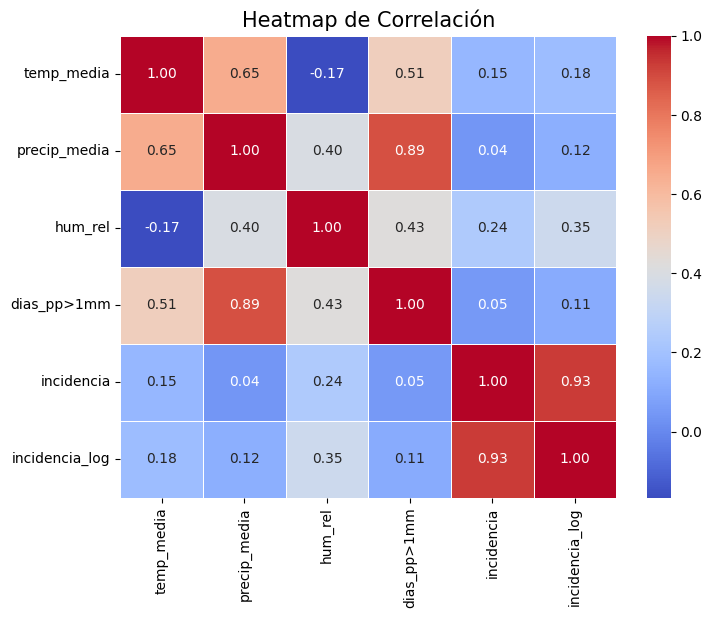

In [65]:
plt.figure(figsize=(8, 6))
correlation_matrix = df_var_amb.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlación', fontsize=15)
plt.show()

**INSIGHTS CLAVES:**
 
- Se observa que las variables temperatura y la humedad presentan una asociación positiva con la incidencia del dengue, la cual se vuelve más clara al aplicar transformaciones logarítmicas. Sin embargo, estas variables no explican completamente la dinámica de la enfermedad, lo que refuerza la naturaleza multicausal del dengue y la necesidad de incorporar factores sociales, sanitarios y temporales para un análisis epidemiológico más integral

- Correlación fuerte entre "precip_media" y "dias_pp>1mm" lo que podría sugerir multicolinealidad y puede pensarse en eliminar una de ellas para análisis posteriores

- Se refuerza la idea de que la incidencia del dengue depende no solo de las condiciones climáticas que favorecen la proliferación del vector, sino también de la efectividad de las medidas de prevención y control, la gestión del saneamiento urbano, la presencia de criaderos domiciliarios, la densidad poblacional, los patrones de movilidad de la población, la introducción de serotipos virales y la capacidad de vigilancia epidemiológica de cada jurisdicción. Por lo tanto, aunque las variables ambientales actúan como factores facilitadores claves, las variaciones observadas entre provincias reflejan un fenómeno multifactorial donde la interacción entre clima, ambiente y políticas de control determina en última instancia la magnitud de la incidencia.

# **4. Comparación exploratoria de modelos**

En esta sección se realiza una comparación exploratoria entre distintos enfoques de modelado con el objetivo de evaluar su capacidad para ajustarse a los datos disponibles.
Este análisis tiene carácter preliminar y no constituye un modelo predictivo final.

- **4.1 Feature engineering: Rezagos temporales (lasg)**
- **4.2 Modelado estadístico (OLS)**
- **4.3 Modelo: Random Forest**
- **4.4 Modelo: Random Foest + tuning**
- **4.5 Modelos exploratorios: Conclusión**
- **4.6 Trabajo futuro / Próximos pasos**

## **4.1. Feature engineering: Lags temporales**

Permiten explorar la dependencia temporal y los efectos retardados en la dinámica epidemiológica, identificando ventanas de tiempo relevantes para la predicción. Su análisis orienta la selección de variables y la estructura de los modelos de machine learning supervisados.

In [66]:
#Copia del dataset para agregar lags temporales
df_lags = df_agrup_acum.copy()

df_lags = (
    df_lags.sort_values(["provincia", "año", "SE"])
      .reset_index(drop=True)
)

In [67]:
#Función que genera lags temporales simples
def crear_lags(df_lags, cols, lags, grupo="provincia"):
    df_lags = df_lags.copy()
    for col in cols:
        for lag in lags:
            df_lags[f"{col}_lag{lag}"] = (
                df_lags.groupby(grupo)[col].shift(lag)
            )
    return df_lags

In [68]:
#Crea de lags temporales simples para humedad relativa
df_lags = crear_lags(
    df_lags,
    cols=["hum_rel"],
    lags=[1, 2]
)

In [69]:
#Función que genera rolling mean + lag, permitiendo capturar mejor el PROCESO BIOLÓGICO DEL VECTOR (MAS REALISTA)


def crear_rolling_lags(
    df_lags,
    cols,
    windows,
    lags,
    grupo="provincia"
):
    df_lags = df_lags.copy()
    for col in cols:
        for lag in lags:
            for w in windows:
                df_lags[f"{col}_lag{lag}_roll{w}"] = (
                    df_lags.groupby(grupo)[col]
                      .shift(lag)
                      .rolling(w)
                      .mean()
                )
    return df_lags

In [70]:
#Crea dataset con lags + rolling mean para precipitacion media y temperatura media

df_lags = crear_rolling_lags(
    df_lags,
    cols=["precip_media"],
    lags=[3, 4, 5],
    windows=[2, 3]
)

df_lags = crear_rolling_lags(
    df_lags,
    cols=["temp_media"],
    lags=[2, 3],
    windows=[2]
)

In [71]:
#Limpia NaNs sin romper la serie

df_lags = df_lags.dropna(subset=[
    c for c in df_lags.columns if "lag" in c
])

Con el objetivo de evitar sesgos asociados a años incompletos, el modelo fue entrenado exclusivamente con información hasta 2024, último año con cobertura completa de semanas epidemiológicas.

Las predicciones a partir de 2025 se interpretan como escenarios proyectados bajo condiciones climáticas promedio, utilizando un enfoque recursivo basado en la dinámica histórica de la incidencia.

In [72]:
df_lags["año"] = pd.to_numeric(df_lags["año"], errors="coerce")
df_lags_2024 = df_lags[df_lags["año"] <= 2024].copy()

## **4.2. Modelado estadístico (OLS)**

In [73]:
features = [
    "precip_media_lag4_roll3",
    "temp_media_lag2_roll2",
    "hum_rel_lag1"
]

df_lags1 = (
    df_lags_2024
    .dropna(subset=features + ["incidencia_log"])
    .copy()
)

In [74]:
X = df_lags1[features]
X = sm.add_constant(X)

y = df_lags1["incidencia_log"]

model_lin = sm.OLS(y, X).fit()
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:         incidencia_log   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1442.
Date:                Wed, 04 Feb 2026   Prob (F-statistic):               0.00
Time:                        18:22:35   Log-Likelihood:                -70015.
No. Observations:              103186   AIC:                         1.400e+05
Df Residuals:                  103182   BIC:                         1.401e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [75]:
r2_ols = model_lin.rsquared

y_pred_ols = model_lin.predict(X)

rmse_ols = np.sqrt(mean_squared_error(y, y_pred_ols))

print(f"OLS R²: {r2_ols:.3f}")
print(f"OLS RMSE: {rmse_ols:.3f}")

OLS R²: 0.040
OLS RMSE: 0.477


**INSIGHTS CLAVES:**

- Este modelo indica que la temperatura y la humedad aumentan la incidencia de dengue con un delay corto
- La precipitación tiene un efecto más complejo y posiblemente no lineal
- El clima explica solo una parte pequeña del fenómeno

OLS ya mostró la señal de que tenemos que explorar otros modelos que permitan capturar no linealidad y umbrales climáticos. Vamos además, a agregar estructura mediante efectos por provincia, estacionalidad y tendencia temporal

In [76]:
#Dataset con variables climáticas por año y SE para alinearlas con la escala temporal del evento epidemiológico

agregaciones = {
        "cant_casos": "sum",
        "incidencia_log": "mean",
        "temp_media": "mean",
        "precip_media": "mean",
        "hum_rel": "mean"
    }

df_semanal = eda_agrupado(
    df_agrup_acum,
    grupo=["año","SE"],
    agregaciones=agregaciones,
    round_cols=["temp_media","precip_media","hum_rel"],
    sort_by=["año","SE"],
    ascending=False
)

C:\Users\alanr\AppData\Local\Temp\ipykernel_12640\3703066413.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(grupo)


In [77]:
df_ml = df_semanal.copy()

#Dataset con orden temporal real
df_ml = df_ml.sort_values(["año", "SE"])

In [78]:
#Ingenieria temporal de variables para ML

for lag in [1, 2, 4, 8]:
    df_ml[f"incidencia_log_lag_{lag}"] = df_ml["incidencia_log"].shift(lag)

df_ml["incidencia_log_roll_4"] = df_ml["incidencia_log"].rolling(4).mean()
df_ml["incidencia_log_roll_8"] = df_ml["incidencia_log"].rolling(8).mean()

df_ml = df_ml.dropna()

**¡ACLARACIÓN IMPORTANTE!**

Con el objetivo de evitar sesgos asociados a años incompletos, el modelo fue entrenado exclusivamente con información hasta 2024, último año con cobertura completa de semanas epidemiológicas

In [79]:
df_ml["año"] = pd.to_numeric(df_ml["año"], errors="coerce")
df_mlt = df_ml[df_ml["año"] <= 2024].copy()

In [80]:
#Variables finales reales

features = [
    "temp_media",
    "precip_media",
    "hum_rel",
    "SE",
    "incidencia_log_lag_1",
    "incidencia_log_lag_2",
    "incidencia_log_lag_4",
    "incidencia_log_roll_4",
    "incidencia_log_roll_8"
]

X = df_mlt[features]
y = df_mlt["incidencia_log"]

## **4.3. Modelo: Random Forest**

In [81]:
#Loop con validación temporal

tscv = TimeSeriesSplit(n_splits=5)

r2_scores = []
rmse_scores = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf = RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

rf_r2 = np.mean(r2_scores)
rf_rmse = np.mean(rmse_scores)

print(f"Random Forest R² promedio: {rf_r2:.3f}")
print(f"Random Forest RMSE promedio: {rf_rmse:.3f}")

Random Forest R² promedio: 0.349
Random Forest RMSE promedio: 0.049


In [82]:
comparacion = pd.DataFrame({
    "Modelo": ["Regresión Lineal (OLS)", "Random Forest"],
    "R²": [r2_ols, rf_r2],
    "RMSE": [rmse_ols, rf_rmse]})

print(comparacion)

                   Modelo        R²      RMSE
0  Regresión Lineal (OLS)  0.040239  0.476918
1           Random Forest  0.348969  0.049121


El modelo lineal se utilizó como baseline explicativo con un conjunto reducido de variables interpretables, mientras que el modelo de Machine Learning incorpora mayor información temporal para mejorar la capacidad exploratoria.

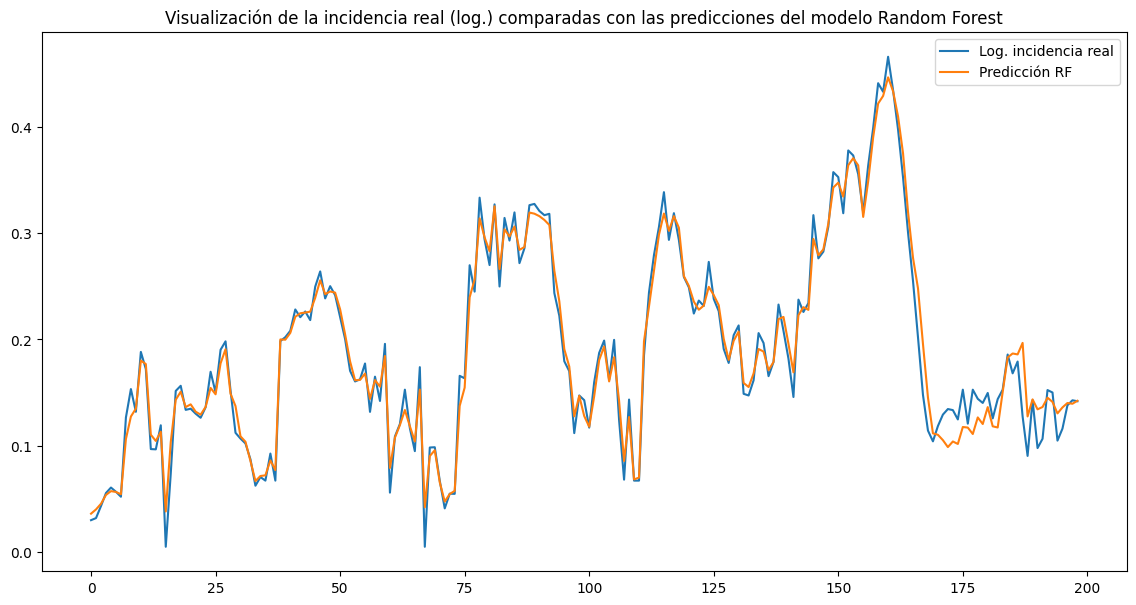

In [83]:
df_mlt["pred_rf"] = rf.predict(X)

plt.figure(figsize=(14,7))
plt.plot(df_mlt["incidencia_log"].values, label="Log. incidencia real")
plt.plot(df_mlt["pred_rf"].values, label="Predicción RF")
plt.legend()
plt.title("Visualización de la incidencia real (log.) comparadas con las predicciones del modelo Random Forest")
plt.show()

**INSIGHTS CLAVES:**

Hay una tendencia general capturada por el modelo, pero se nota que:
- Las variaciones abruptas en la incidencia real no son bien seguidas por la predicción
- En algunos tramos, la predicción es más plana o con retardo respecto a los picos reales
- Esto indica que el modelo exploratorio tiene una capacidad limitada para capturar la dinámica temporal fina de la enfermedad


## **4.4. Modelo: Random Forest + tuning**

In [84]:
#Define convinaciones razonables

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 3, 5],
    "max_features": ["sqrt", 0.7]
}

param_combinations = list(product(
    param_grid["n_estimators"],
    param_grid["max_depth"],
    param_grid["min_samples_leaf"],
    param_grid["max_features"]
))

In [85]:
#Loop con validación temporal

tscv = TimeSeriesSplit(n_splits=5)

results = []

for n_estimators, max_depth, min_leaf, max_feat in param_combinations:

    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        rf = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_leaf=min_leaf,
            max_features=max_feat,
            random_state=42,
            n_jobs=-1
        )

        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        r2_scores.append(r2_score(y_test, y_pred))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    results.append({
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_samples_leaf": min_leaf,
        "max_features": max_feat,
        "R2_mean": np.mean(r2_scores),
        "RMSE_mean": np.mean(rmse_scores)
    })

In [86]:
#Presenta resultados de forma ordenada

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by="R2_mean", ascending=False
)

results_df.head(5)

,n_estimators,max_depth,min_samples_leaf,max_features,R2_mean,RMSE_mean
25,400,10.0,1,0.7,0.354558,0.048987
19,400,NaN,1,0.7,0.354397,0.048957
31,400,20.0,1,0.7,0.354397,0.048957
1,200,NaN,1,0.7,0.353974,0.049085
13,200,20.0,1,0.7,0.353974,0.049085


In [87]:
#Entrena el mejor modelo

best_params = results_df.iloc[0]

max_depth = (
    None if pd.isna(best_params["max_depth"])
    else int(best_params["max_depth"])
)

rf_best = RandomForestRegressor(
    n_estimators=int(best_params["n_estimators"]),
    max_depth=max_depth,
    min_samples_leaf=int(best_params["min_samples_leaf"]),
    max_features=best_params["max_features"],
    random_state=42,
    n_jobs=-1
)

rf_best.fit(X, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",0.7
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

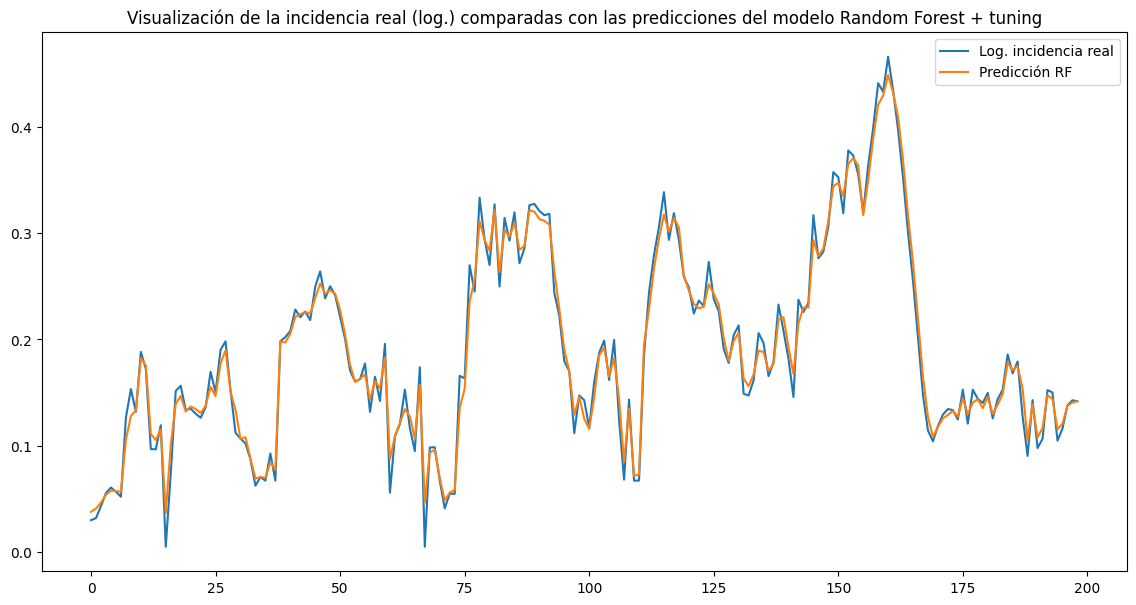

In [88]:
df_mlt["pred_rf"] = rf_best.predict(X)

plt.figure(figsize=(14,7))
plt.plot(df_mlt["incidencia_log"].values, label="Log. incidencia real")
plt.plot(df_mlt["pred_rf"].values, label="Predicción RF")
plt.legend()
plt.title("Visualización de la incidencia real (log.) comparadas con las predicciones del modelo Random Forest + tuning")
plt.show()

**INSIGHTS CLAVES:**

Este modelo fue ajustado (tuning) para mejorar su rendimiento, por lo que su gráfico expresa:
- La línea naranja (predicción) acompaña mucho mejor a la azul (real).
- Se observan picos y valles más sincronizados, lo que indica una mejor capacidad de seguimiento.
- El modelo parece menos sesgado y más sensible a los cambios reales en la incidencia.


In [89]:
#Predice con modelo Random Forest ajustado
y_pred_rf = rf_best.predict(X)

#Cálculo de métricas de desempeño
r2_rf = r2_score(y, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))

r2_rf, rmse_rf

(0.9848316141980772, np.float64(0.011464426121132642))

In [90]:
#Imprime importancia de variables en orden decreciente

importancias = pd.Series(
    rf_best.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importancias

incidencia_log_lag_1     0.472391
incidencia_log_roll_4    0.361953
incidencia_log_lag_2     0.065378
temp_media               0.024640
incidencia_log_roll_8    0.021189
SE                       0.015505
precip_media             0.014129
incidencia_log_lag_4     0.012424
hum_rel                  0.012390
dtype: float64

**HALLAZGO VISUAL DE MODELOS: RF Y RF + TUNING:**

La comparación entre los modelos Random Forest sin tuning y con tuning revela diferencias claras en la capacidad de predicción de la incidencia del dengue:
- El modelo sin tuning muestra una predicción más rígida y desfasada respecto a la incidencia real. Aunque capta la tendencia general, falla en seguir los picos y valles con precisión, lo que limita su utilidad para anticipar brotes.
- En cambio, el modelo ajustado logra una predicción mucho más sincronizada con la curva real. Los picos son mejor capturados, las transiciones son más suaves y el modelo responde con mayor sensibilidad a los cambios en la incidencia.

En contextos de salud pública, donde la anticipación de brotes es crítica, un modelo ajustado como el Random Forest tunado ofrece ventajas claras:
- Mayor precisión en la predicción de la incidencia.
- Mejor alineación temporal, útil para sistemas de alerta temprana.
- Balance entre rendimiento y coste computacional, ideal para implementaciones en entornos reales.

**INTERPRETACIÓN DEL MODELO RANDOM FOREST AJUSTADO**

El análisis del modelo Random Forest con ajuste de hiperparámetros indica que las variables con mayor importancia predictiva están principalmente asociadas a la dinámica temporal de la incidencia del dengue.

La incidencia en el período inmediatamente anterior (lag 1) concentra más del 50% de la importancia relativa del modelo, lo que evidencia una fuerte autocorrelación temporal. De manera consistente, los promedios móviles de corto plazo (roll 4) también presentan una contribución relevante, reforzando la idea de que la evolución reciente de los casos es el principal predictor del comportamiento a corto plazo.

Los rezagos más largos y promedios móviles más extensos muestran una importancia menor, lo que sugiere que la “memoria” epidemiológica del sistema analizado es relativamente corta y depende principalmente de los registros de las últimas semanas.

En cuanto a las variables ambientales, la temperatura media y la precipitación presentan una contribución moderada, en concordancia con la literatura que destaca su influencia en la proliferación del vector *Aedes aegypti*. La humedad relativa y la variable estacional muestran un impacto reducido en este conjunto de datos, indicando un rol secundario frente a la dinámica propia de la incidencia.



In [91]:
#Por último hacemos la comparación final de los modelos

comparacion_final = pd.DataFrame({
    "Modelo": [
        "Regresión Lineal (OLS)",
        "Random Forest (base)",
        "Random Forest (ajustado)"
    ],
    "R²": [
        r2_ols,
        rf_r2,
        best_params["R2_mean"]
    ],
    "RMSE": [
        rmse_ols,
        rf_rmse,
        best_params["RMSE_mean"]
    ]
})

comparacion_final

,Modelo,R²,RMSE
0,Regresión Lineal (OLS),0.040239,0.476918
1,Random Forest (base),0.348969,0.049121
2,Random Forest (ajustado),0.354558,0.048987


## **4.5. Conclusión integral sobre la comparación exploratoria de modelos**

El análisis comparativo realizado sugiere que el modelo Random Forest con ajuste de hiperparámetros presenta el mejor desempeño entre los enfoques evaluados, superando tanto al modelo lineal como al Random Forest sin tuning. El proceso de ajuste permitió capturar de manera más precisa la dinámica temporal de la incidencia del dengue, logrando una mejor correspondencia entre los valores observados y estimados.

No obstante, este análisis debe interpretarse en un marco exploratorio. El modelo fue construido exclusivamente a partir de variables climáticas y temporales, sin incorporar factores socioeconómicos, culturales, preventivos ni de infraestructura sanitaria. Esta limitación se refleja en un poder explicativo moderado (R² ≈ 0.33), lo cual resulta esperable dada la naturaleza multifactorial de la epidemiología del dengue.

En síntesis, dentro del conjunto de modelos evaluados, el Random Forest ajustado constituye la alternativa técnica más adecuada para describir patrones generales en los datos disponibles. Sin embargo, el desarrollo de modelos con mayor capacidad predictiva y aplicabilidad en políticas públicas requerirá la integración de variables adicionales que permitan representar de manera más completa la complejidad de los procesos de transmisión y control de la enfermedad.

**¡IMPORTANTE!**

El modelo ajustado reduce el error respecto al modelo base y mejora la capacidad de seguimiento temporal de los brotes, aunque no se plantea como herramienta operativa sin validación adicional.


## **4.6. Trabajo futuro / Próximos pasos**

A partir de los resultados obtenidos, se identifican diversas líneas de trabajo futuro que permitirían profundizar y fortalecer el análisis realizado:

- Incorporar variables socioeconómicas, demográficas y de infraestructura sanitaria (condiciones de vivienda, acceso a servicios de salud, indicadores de vulnerabilidad), con el objetivo de capturar la naturaleza multifactorial de la transmisión del dengue.
- Desarrollar modelos predictivos con validación más robusta, incorporando esquemas de entrenamiento y prueba temporales, métricas adicionales de desempeño y análisis de incertidumbre.
- Explorar enfoques de modelado específicos para series temporales, como modelos autoregresivos o métodos basados en aprendizaje automático adaptados a datos secuenciales.
- Profundizar el análisis espacial mediante técnicas de análisis geográfico que permitan identificar clusters de riesgo y patrones territoriales de mayor resolución.
- Implementar visualizaciones interactivas o dashboards que faciliten la comunicación de resultados a decisores y equipos de salud pública.
